<a href="https://colab.research.google.com/github/oyhr100/LAB-5-raterx/blob/main/_lab5_0410_2347.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook Settings**

In [4]:
%matplotlib inline
# Use %matplotlib ipympl or %matplotlib widget if you want interactive matplotlib plots
#%matplotlib widget

# Shuts off Jedi to speed up tab completions
# the command %config Completer.use_jedi = False is used in IPython or Jupyter environments to disable the use of the Jedi library for autocompletion, which can sometimes lead to faster completion suggestions.
%config Completer.use_jedi = False

# reloads modules automatically before entering the execution of code typed at the IPython prompt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import multiprocessing
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy.stats as ss
import seaborn as sns

## Import various ML classes from Scikit-learn
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
import statsmodels.api as sm

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, PrecisionRecallDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict, StratifiedShuffleSplit, train_test_split

import string
from time import time

In [6]:
#mport ast refers to importing the ast module, which is a part of Python's standard library. The ast module provides facilities for processing, analyzing, and modifying Abstract Syntax Trees (ASTs).
import ast
import datetime
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import plotly.express as px
import seaborn as sns
import scipy.stats as ss
#The primary use of the tqdm function is to wrap around any iterable, like a list or a loop, to display a smart progress meter.
#For example, if you have a for loop that iterates over a large dataset, you can wrap tqdm around the iterable, and it will display a progress bar that updates with each iteration.
from tqdm import tqdm

!pip install itables
# To display dataframes as interactive tables in the notebook:
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.5 MB/s eta 0:00:00


In [7]:
import ast
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns
import scipy.stats as ss

In [8]:
import os
# https://drive.google.com/file/d/19LbtW4l9fNhGZ-6NxINfD7NjEuSK6YH2/view?usp=sharing


if not os.path.exists("20-raterx-data.pq"):
    !gdown --id 19LbtW4l9fNhGZ-6NxINfD7NjEuSK6YH2

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19LbtW4l9fNhGZ-6NxINfD7NjEuSK6YH2
To: /content/20-raterx-data.pq
100% 3.52M/3.52M [00:00<00:00, 39.4MB/s]


In [9]:
plt.rcParams.update({'font.size': 16})
DFILE = '20-raterx-data.pq'
SEED = 24
TOL = 1.0e-8

# **Problem 1**

In [10]:
import pyarrow.parquet as pq

DFILE = '20-raterx-data.pq'
df = pq.read_table(DFILE).to_pandas()
df

gvkey   datadate             conm    sich credit_rating     che  \
0        1004 1990-05-31         AAR CORP  5080.0           BBB   4.044   
1        1004 1991-05-31         AAR CORP  5080.0           BBB   1.553   
2        1004 1992-05-31         AAR CORP  5080.0           BBB   4.197   
3        1004 1993-05-31         AAR CORP  5080.0           BBB   2.255   
4        1004 1994-05-31         AAR CORP  5080.0           BBB  18.074   
...       ...        ...              ...     ...           ...     ...   
26924  266163 2008-12-31  DUNE ENERGY INC  1311.0            B-  15.492   
26925  266163 2009-12-31  DUNE ENERGY INC  1311.0          CCC-  15.053   
26926  266163 2010-12-31  DUNE ENERGY INC  1311.0          CCC-  39.423   
26927  311524 2012-12-31     TAMINCO CORP  2860.0            B+  67.000   
26928  311524 2013-12-31     TAMINCO CORP  2860.0            B+  88.000   

           act    ppent        at     dlc  ...      sale     cogs     xsga  \
0      275.576   63.441   388.521  33.821  ...   444.875  336.931   53.912   
1      268.399   63.415   379.958  16.500  ...   466.542  366.040   58.545   
2      289.537   60.422   395.351  25.005  ...   422.657  331.056   56.910   
3      265.036   56.052   365.151  25.025  ...   382.780  307.436   52.093   
4      307.723   54.783   417.626   0.568  ...   407.754  328.562   50.086   
...        ...      ...       ...     ...  ...       ...      ...      ...   
26924   40.895  357.284   402.052   2.014  ...   146.600  169.196   18.586   
26925   32.805  334.328   372.587   1.579  ...    64.873   34.757   14.321   
26926   51.829  232.721   297.386   1.395  ...    64.189   60.175   11.157   
26927  297.000  434.000  1847.000   6.000  ...  1116.000  823.200  128.000   
26928  311.000  470.000  1856.000   7.000  ...  1200.000  871.200   79.000   

       xrent    oibdp    oiadp    xint  intc       ib      dvp  
0       4.25   54.032   46.851   9.989   0.0   25.655    0.000  
1       4.31   41.957   33.701  10.073   0.0   14.801    0.000  
2       4.85   34.691   26.530   8.356   0.0   10.020    0.000  
3       5.32   23.251   16.343   8.107   0.0    0.283    0.000  
4       4.84   29.106   21.824   9.564   0.0    9.484    0.000  
...      ...      ...      ...     ...   ...      ...      ...  
26924   0.90  -41.182  -98.786  35.022   0.0 -108.728  100.597  
26925   0.80   15.795  -21.202  35.193   0.0  -59.131   36.728  
26926   0.80   -7.143  -36.020  37.424   0.0  -72.057   26.419  
26927  16.60  164.800   67.000  78.200   0.2  -82.000    0.000  
26928  17.10  249.800  135.000  84.500   0.5   -7.000    0.000  

[26929 rows x 27 columns]

In [11]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 26929 rows and 27 columns.


In [12]:
print(df.columns)
print(df.dtypes)

Index(['gvkey', 'datadate', 'conm', 'sich', 'credit_rating', 'che', 'act',
       'ppent', 'at', 'dlc', 'lct', 'dltt', 'lt', 'txdb', 're', 'seq', 'mib',
       'sale', 'cogs', 'xsga', 'xrent', 'oibdp', 'oiadp', 'xint', 'intc', 'ib',
       'dvp'],
      dtype='object')
gvkey                     int64
datadate         datetime64[us]
conm                     object
sich                    float64
credit_rating          category
che                     float64
act                     float64
ppent                   float64
at                      float64
dlc                     float64
lct                     float64
dltt                    float64
lt                      float64
txdb                    float64
re                      float64
seq                     float64
mib                     float64
sale                    float64
cogs                    float64
xsga                    float64
xrent                   float64
oibdp                   float64
oiadp                   fl

In [13]:
print(df.isnull().sum())

gvkey               0
datadate            0
conm                0
sich                0
credit_rating       0
che                50
act              1359
ppent              98
at                 37
dlc                82
lct              1237
dltt               49
lt                 45
txdb             1898
re                771
seq                36
mib              3909
sale               49
cogs               49
xsga             2262
xrent            1871
oibdp              98
oiadp              50
xint              299
intc             2033
ib                 49
dvp                50
dtype: int64


In [14]:
duplicates = df.duplicated()
print(f"There are {duplicates.sum()} duplicated rows.")

There are 0 duplicated rows.


In [15]:
print(df.describe())

               gvkey                    datadate          sich            che  \
count   26929.000000                       26929  26929.000000   26879.000000   
mean    39780.657210  2003-11-14 04:43:40.758290   4162.580267     720.860158   
min      1004.000000         1990-01-31 00:00:00    100.000000       0.000000   
25%      6386.000000         1997-12-31 00:00:00   2834.000000      20.719000   
50%     12480.000000         2003-10-31 00:00:00   3711.000000      86.504000   
75%     61338.000000         2009-12-31 00:00:00   5172.000000     355.650000   
max    311524.000000         2016-12-31 00:00:00   9997.000000  113240.000000   
std     53590.724638                         NaN   1910.456502    3516.283431   

                 act          ppent             at            dlc  \
count   25570.000000   26831.000000   26892.000000   26847.000000   
mean     2162.046753    2684.529699    8225.283046     511.319648   
min         0.861000       0.000000       0.861000    -882.0000

## Limitations and Issues:

1. Several columns have missing values, necessitating decisions on how to handle missing data through

2. Limited contextual information and potential data quality issues, such as outliers or inconsistencies, may require further research and data validation.


# **Problem 2**
Perform feature engineering on the data to construct a set of predictors for your model.

## a. What variables do you think will be informative about a firms’ credit ratings? Justify your choices.


1. `che` (Cash and Short-Term Marketable Securities): High levels of cash provide a buffer for the company to meet short-term obligations, which is favorable for credit standing.

2. `ppent` (Plant, Property, and Equipment net of Accumulated Depreciation): This represents the company's investment in long-term assets, indicating the scale of operations and the potential for future revenues.

3. `at` (Total Assets): The total assets of a company provide insight into the company's size and resource base, which can impact its borrowing capacity.

4. `dlc` (Short-Term Debt and Debt Due Within One Year): Short-term debt levels can signal the company's liquidity risk and immediate financial obligations.

5. `lct` (Total Current Liabilities): Current liabilities are obligations due within one year; higher liabilities can indicate higher risk of default.

6. `lt` (Total Liabilities): The total liabilities indicate the company's overall indebtedness and long-term financial commitments.

7. `txdb` (Deferred Taxes): Deferred taxes can affect a company's future tax liabilities and cash flow.

8. `re` (Retained Earnings): Retained earnings show how much profit is reinvested in the company, which can fund growth and reduce reliance on external financing.

9. `seq` (Total Stockholders Equity): Stockholders' equity represents the owners' claim on the company after liabilities are paid off and is indicative of the company's net worth.

10. `mib` (Minority Interest): Minority interest in a company can affect the available share of profits and control over the company.

11. `xsga` (Selling, General, and Administrative Expenses): These expenses can indicate the efficiency of operations and impact profitability.

12. `xrent` (Rental Expense): High rental expenses can reduce profitability and impact cash flows.

13. `oiadp` (Operating Income Before Depreciation): This is a measure of the company's profitability from its core operations before accounting for the cost of capital assets.

14. `xint` (Interest Expense): The cost of servicing debt, which can significantly affect net income and the ability to meet financial obligations.

## b. Are there any manipulations or transformations to the predictors you believe should be made? Justify your choices.

**logarithmic form**

1. **Normalization**: Logarithmic transformation helps in normalizing the data, especially when the values across different variables or time periods vary significantly. This normalization can make the data more comparable and easier to analyze.

2. **Reduce Skewness**: Financial data often exhibit skewness, where a few extreme values can distort the overall picture. Taking the logarithm of the data can mitigate the impact of outliers, making the distribution more symmetrical and improving the robustness of statistical analyses.

3. **Interpretability**: Logarithmic transformations can enhance the interpretability of the data, particularly when dealing with exponential growth or decay. For example, in finance, variables like returns on investments or growth rates are often more interpretable when expressed in logarithmic form.

4. **Stabilize Variance**: Logarithmic transformations can stabilize the variance of the data, which is important for certain types of statistical analyses that assume constant variance (homoscedasticity), such as linear regression.

5. **Highlight Percentage Changes**: Taking the logarithm of variables like assets and liabilities highlights percentage changes rather than absolute changes. This is useful for detecting trends or patterns in growth rates, which are often of greater interest to investors and analysts.

`df[i].apply(lambda x: np.log(x) if x > 0 else (0 if x == 0 else -np.log(-x)))`\

This code can help convert the minus data into proper logarithm.

In [16]:
df = pd.read_parquet(DFILE)


vlist = [ 'che', 'act',
       'ppent', 'at', 'dlc', 'lct', 'dltt', 'lt', 'txdb', 're', 'seq', 'mib',
       'sale', 'cogs', 'xsga', 'xrent', 'oibdp', 'oiadp', 'xint', 'intc', 'ib',
       'dvp']

for i in vlist:
  df['l_'+i] = df[i].apply(lambda x: np.log(x) if x > 0 else (0 if x == 0 else -np.log(-x)))

df

gvkey   datadate             conm    sich credit_rating     che  \
0        1004 1990-05-31         AAR CORP  5080.0           BBB   4.044   
1        1004 1991-05-31         AAR CORP  5080.0           BBB   1.553   
2        1004 1992-05-31         AAR CORP  5080.0           BBB   4.197   
3        1004 1993-05-31         AAR CORP  5080.0           BBB   2.255   
4        1004 1994-05-31         AAR CORP  5080.0           BBB  18.074   
...       ...        ...              ...     ...           ...     ...   
26924  266163 2008-12-31  DUNE ENERGY INC  1311.0            B-  15.492   
26925  266163 2009-12-31  DUNE ENERGY INC  1311.0          CCC-  15.053   
26926  266163 2010-12-31  DUNE ENERGY INC  1311.0          CCC-  39.423   
26927  311524 2012-12-31     TAMINCO CORP  2860.0            B+  67.000   
26928  311524 2013-12-31     TAMINCO CORP  2860.0            B+  88.000   

           act    ppent        at     dlc  ...    l_sale    l_cogs    l_xsga  \
0      275.576   63.441   388.521  33.821  ...  6.097793  5.819878  3.987353   
1      268.399   63.415   379.958  16.500  ...  6.145348  5.902743  4.069796   
2      289.537   60.422   395.351  25.005  ...  6.046561  5.802288  4.041471   
3      265.036   56.052   365.151  25.025  ...  5.947460  5.728267  3.953031   
4      307.723   54.783   417.626   0.568  ...  6.010664  5.794726  3.913742   
...        ...      ...       ...     ...  ...       ...       ...       ...   
26924   40.895  357.284   402.052   2.014  ...  4.987708  5.131058  2.922409   
26925   32.805  334.328   372.587   1.579  ...  4.172432  3.548381  2.661727   
26926   51.829  232.721   297.386   1.395  ...  4.161832  4.097257  2.412067   
26927  297.000  434.000  1847.000   6.000  ...  7.017506  6.713199  4.852030   
26928  311.000  470.000  1856.000   7.000  ...  7.090077  6.769872  4.369448   

        l_xrent   l_oibdp   l_oiadp    l_xint    l_intc      l_ib     l_dvp  
0      1.446919  3.989576  3.846972  2.301484  0.000000  3.244738  0.000000  
1      1.460938  3.736645  3.517528  2.309859  0.000000  2.694695  0.000000  
2      1.578979  3.546480  3.278276  2.122980  0.000000  2.304583  0.000000  
3      1.671473  3.146348  2.793800  2.092728  0.000000 -1.262308  0.000000  
4      1.576915  3.370944  3.083010  2.258006  0.000000  2.249606  0.000000  
...         ...       ...       ...       ...       ...       ...       ...  
26924 -0.105361 -3.718001 -4.592956  3.555976  0.000000 -4.688849  4.611122  
26925 -0.223144  2.759693 -3.054096  3.560847  0.000000 -4.079755  3.603539  
26926 -0.223144 -1.966133 -3.584074  3.622312  0.000000 -4.277457  3.274083  
26927  2.809403  5.104733  4.204693  4.359270 -1.609438 -4.406719  0.000000  
26928  2.839078  5.520661  4.905275  4.436752 -0.693147 -1.945910  0.000000  

[26929 rows x 49 columns]

**Convert credit rating to number**

In order to estimate a Logit model, the "Y" variable should be a dummy, i.e. it can only take the values 0 and 1.

One way to do it is to define:

"Investment-grade bonds" = 1

"Non-investment grade bonds" = 0

In [17]:
# Mapping from credit ratings to numbers
credit_rating_to_number = {
    'AAA': 1,
    'AA+': 1,
    'AA': 1,
    'AA-': 1,
    'A+': 1,
    'A': 1,
    'A-': 1,
    'BBB+': 1,
    'BBB': 1,
    'BBB-': 1,
    'BB+': 0,
    'BB': 0,
    'BB-': 0,
    'B+': 0,
    'B': 0,
    'B-': 0,
    'CCC+': 0,
    'CCC': 0,
    'CCC-': 0,
    'CC': 0,
    'C': 0,
    'D': 0,
}

df['credit_rating_number'] = df['credit_rating'].map(credit_rating_to_number)
df = df.dropna()
df

gvkey   datadate             conm    sich credit_rating     che  \
0        1004 1990-05-31         AAR CORP  5080.0           BBB   4.044   
1        1004 1991-05-31         AAR CORP  5080.0           BBB   1.553   
2        1004 1992-05-31         AAR CORP  5080.0           BBB   4.197   
3        1004 1993-05-31         AAR CORP  5080.0           BBB   2.255   
4        1004 1994-05-31         AAR CORP  5080.0           BBB  18.074   
...       ...        ...              ...     ...           ...     ...   
26924  266163 2008-12-31  DUNE ENERGY INC  1311.0            B-  15.492   
26925  266163 2009-12-31  DUNE ENERGY INC  1311.0          CCC-  15.053   
26926  266163 2010-12-31  DUNE ENERGY INC  1311.0          CCC-  39.423   
26927  311524 2012-12-31     TAMINCO CORP  2860.0            B+  67.000   
26928  311524 2013-12-31     TAMINCO CORP  2860.0            B+  88.000   

           act    ppent        at     dlc  ...    l_cogs    l_xsga   l_xrent  \
0      275.576   63.441   388.521  33.821  ...  5.819878  3.987353  1.446919   
1      268.399   63.415   379.958  16.500  ...  5.902743  4.069796  1.460938   
2      289.537   60.422   395.351  25.005  ...  5.802288  4.041471  1.578979   
3      265.036   56.052   365.151  25.025  ...  5.728267  3.953031  1.671473   
4      307.723   54.783   417.626   0.568  ...  5.794726  3.913742  1.576915   
...        ...      ...       ...     ...  ...       ...       ...       ...   
26924   40.895  357.284   402.052   2.014  ...  5.131058  2.922409 -0.105361   
26925   32.805  334.328   372.587   1.579  ...  3.548381  2.661727 -0.223144   
26926   51.829  232.721   297.386   1.395  ...  4.097257  2.412067 -0.223144   
26927  297.000  434.000  1847.000   6.000  ...  6.713199  4.852030  2.809403   
26928  311.000  470.000  1856.000   7.000  ...  6.769872  4.369448  2.839078   

        l_oibdp   l_oiadp    l_xint    l_intc      l_ib     l_dvp  \
0      3.989576  3.846972  2.301484  0.000000  3.244738  0.000000   
1      3.736645  3.517528  2.309859  0.000000  2.694695  0.000000   
2      3.546480  3.278276  2.122980  0.000000  2.304583  0.000000   
3      3.146348  2.793800  2.092728  0.000000 -1.262308  0.000000   
4      3.370944  3.083010  2.258006  0.000000  2.249606  0.000000   
...         ...       ...       ...       ...       ...       ...   
26924 -3.718001 -4.592956  3.555976  0.000000 -4.688849  4.611122   
26925  2.759693 -3.054096  3.560847  0.000000 -4.079755  3.603539   
26926 -1.966133 -3.584074  3.622312  0.000000 -4.277457  3.274083   
26927  5.104733  4.204693  4.359270 -1.609438 -4.406719  0.000000   
26928  5.520661  4.905275  4.436752 -0.693147 -1.945910  0.000000   

       credit_rating_number  
0                         1  
1                         1  
2                         1  
3                         1  
4                         1  
...                     ...  
26924                     0  
26925                     0  
26926                     0  
26927                     0  
26928                     0  

[15986 rows x 50 columns]

**Financial ratios calculation**:

The following financial ratios are commonly used to assess the financial health and performance of a company:

1. **Current Ratio**: Measures a company's ability to meet short-term liabilities with its short-term assets. It is calculated by dividing current assets by current liabilities.

2. **Interest Coverage Ratio**: Indicates a company's ability to cover its interest expenses with its earnings before interest, taxes, depreciation, and amortization (EBITDA). It is calculated by dividing EBITDA by interest expenses.

3. **Return on Equity (ROE)**: Measures the profitability of a company in relation to shareholders' equity. It is calculated by dividing net income by shareholders' equity.

4. **Asset Turnover Ratio**: Measures a company's efficiency in generating sales revenue from its assets. It is calculated by dividing sales revenue by average total assets.

5. **Gross Profit Margin**: Represents the percentage of revenue that exceeds the cost of goods sold. It is calculated by subtracting the cost of goods sold from total revenue and dividing by total revenue.

6. **Operating Margin**: Indicates the percentage of each dollar of revenue that is left after paying for variable costs of production, such as wages and raw materials. It is calculated by dividing operating income by total revenue.

7. **Net Profit Margin**: Measures the percentage of revenue that remains as net income after all expenses have been deducted. It is calculated by dividing net income by total revenue.

8. **Return on Assets (ROA)**: Measures a company's profitability relative to its total assets. It is calculated by dividing net income by average total assets.

9. **Debt Ratio**: Represents the proportion of a company's assets that are financed by debt. It is calculated by dividing total liabilitiesnd credit exposures.

Because the denominator may be zero, we set those ratio directly 100.

In [18]:
df['current_ratio'] = np.where(df['lct'] == 0, 100, df['act'] / df['lct'])
df['interest_coverage'] = np.where(df['xint'] == 0, 100, df['oibdp'] / df['xint'])
df['return_on_equity'] = np.where(df['seq'] == 0, 100, df['ib'] / df['seq'])
df['asset_turnover'] = np.where(df['at'] == 0, 100, df['sale'] / df['at'])

df['gross_profit_margin'] = np.where(df['sale'] == 0, 100, (df['sale'] - df['cogs']) / df['sale'])
df['operating_margin'] = np.where(df['sale'] == 0, 100, df['oibdp'] / df['sale'])
df['net_profit_margin'] = np.where(df['sale'] == 0, 100, df['ib'] / df['sale'])
df['return_on_asset'] = np.where(df['at'] == 0, 100, df['ib'] / df['at'])
df['debt_ratio'] = np.where(df['at'] == 0, 100, df['lt'] / df['at'])

<ipython-input-18-7c12ec491918>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['current_ratio'] = np.where(df['lct'] == 0, 100, df['act'] / df['lct'])
<ipython-input-18-7c12ec491918>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['interest_coverage'] = np.where(df['xint'] == 0, 100, df['oibdp'] / df['xint'])
<ipython-input-18-7c12ec491918>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [19]:
df_new = df
df_new

gvkey   datadate             conm    sich credit_rating     che  \
0        1004 1990-05-31         AAR CORP  5080.0           BBB   4.044   
1        1004 1991-05-31         AAR CORP  5080.0           BBB   1.553   
2        1004 1992-05-31         AAR CORP  5080.0           BBB   4.197   
3        1004 1993-05-31         AAR CORP  5080.0           BBB   2.255   
4        1004 1994-05-31         AAR CORP  5080.0           BBB  18.074   
...       ...        ...              ...     ...           ...     ...   
26924  266163 2008-12-31  DUNE ENERGY INC  1311.0            B-  15.492   
26925  266163 2009-12-31  DUNE ENERGY INC  1311.0          CCC-  15.053   
26926  266163 2010-12-31  DUNE ENERGY INC  1311.0          CCC-  39.423   
26927  311524 2012-12-31     TAMINCO CORP  2860.0            B+  67.000   
26928  311524 2013-12-31     TAMINCO CORP  2860.0            B+  88.000   

           act    ppent        at     dlc  ...  credit_rating_number  \
0      275.576   63.441   388.521  33.821  ...                     1   
1      268.399   63.415   379.958  16.500  ...                     1   
2      289.537   60.422   395.351  25.005  ...                     1   
3      265.036   56.052   365.151  25.025  ...                     1   
4      307.723   54.783   417.626   0.568  ...                     1   
...        ...      ...       ...     ...  ...                   ...   
26924   40.895  357.284   402.052   2.014  ...                     0   
26925   32.805  334.328   372.587   1.579  ...                     0   
26926   51.829  232.721   297.386   1.395  ...                     0   
26927  297.000  434.000  1847.000   6.000  ...                     0   
26928  311.000  470.000  1856.000   7.000  ...                     0   

       current_ratio  interest_coverage  return_on_equity  asset_turnover  \
0           3.040201           5.409150          0.135348        1.145048   
1           3.387721           4.165293          0.076381        1.227878   
2           3.137218           4.151628          0.050931        1.069068   
3           3.699708           2.868015          0.001496        1.048279   
4           4.544452           3.043287          0.050051        0.976362   
...              ...                ...               ...             ...   
26924       0.885883          -1.175889         -2.150900        0.364629   
26925       0.850355           0.448811        193.872131        0.174115   
26926       2.166492          -0.190867          0.969759        0.215844   
26927       2.076923           2.107417         -0.302583        0.604223   
26928       2.006452           2.956213         -0.013333        0.646552   

       gross_profit_margin  operating_margin  net_profit_margin  \
0                 0.242639          0.121454           0.057668   
1                 0.215419          0.089932           0.031725   
2                 0.216727          0.082078           0.023707   
3                 0.196834          0.060742           0.000739   
4                 0.194215          0.071381           0.023259   
...                    ...               ...                ...   
26924            -0.154134         -0.280914          -0.741664   
26925             0.464230          0.243476          -0.911489   
26926             0.062534         -0.111281          -1.122576   
26927             0.262366          0.147670          -0.073477   
26928             0.274000          0.208167          -0.005833   

       return_on_asset  debt_ratio  
0             0.066032    0.512129  
1             0.038954    0.490002  
2             0.025345    0.502374  
3             0.000775    0.481814  
4             0.022709    0.546273  
...                ...         ...  
26924        -0.270433    0.874270  
26925        -0.158704    1.000819  
26926        -0.242301    1.249857  
26927        -0.044396    0.853276  
26928        -0.003772    0.717134  

[15986 rows x 59 columns]

In [20]:
df_new.columns

Index(['gvkey', 'datadate', 'conm', 'sich', 'credit_rating', 'che', 'act',
       'ppent', 'at', 'dlc', 'lct', 'dltt', 'lt', 'txdb', 're', 'seq', 'mib',
       'sale', 'cogs', 'xsga', 'xrent', 'oibdp', 'oiadp', 'xint', 'intc', 'ib',
       'dvp', 'l_che', 'l_act', 'l_ppent', 'l_at', 'l_dlc', 'l_lct', 'l_dltt',
       'l_lt', 'l_txdb', 'l_re', 'l_seq', 'l_mib', 'l_sale', 'l_cogs',
       'l_xsga', 'l_xrent', 'l_oibdp', 'l_oiadp', 'l_xint', 'l_intc', 'l_ib',
       'l_dvp', 'credit_rating_number', 'current_ratio', 'interest_coverage',
       'return_on_equity', 'asset_turnover', 'gross_profit_margin',
       'operating_margin', 'net_profit_margin', 'return_on_asset',
       'debt_ratio'],
      dtype='object')

# **Problem 3**

Ensure you understand the data and that the data is ready for modeling and inference.

EDA should also provide insights into the modeling process (e.g., what to expectin terms of variable relations, potential problems)

# Train-test split

In [21]:
# train size
train_size = 0.75
df_train = df_new.sample(frac=train_size,replace=False,random_state=SEED) #replace=False ensures that the same row is not selected more than once.
df_train.drop(columns=['gvkey', 'datadate', 'conm', 'sich'], inplace=True)
# test data
# Create a set of indices for the test set.
# set(df.index) creates a set of all indices in the original DataFrame.
# set(df_train.index) creates a set of indices that were selected for the training set.
# Subtracting these two sets (set(df.index) - set(df_train.index)) leaves the indices that were not selected for training, which are the indices for the test set.
test_inds = set(df_new.index) - set(df_train.index)

#df.loc[list(test_inds)] selects the rows from the original DataFrame (df) that correspond to the test indices (test_inds).
# This creates the test DataFrame (df_test), which contains the remaining 25% of the data not used in the training set.
df_test = df.loc[list(test_inds)]

# tests
assert np.abs(int(df.shape[0]*train_size) - df_train.shape[0]) <= 1
assert df.shape[0] == df_train.shape[0] + df_test.shape[0]

In [30]:
df_train

credit_rating       che       act      ppent         at      dlc  \
21416            B+     8.756    89.086     10.784    247.932    0.811   
23042           BB-    15.200   927.200   2168.600   4735.400   74.500   
2011           BBB-   714.000  2491.000  21780.000  25534.000  787.000   
397            BBB-  1956.000  7953.000  14815.000  36528.000   59.000   
18535           BB-     0.661   150.185    239.270    394.793   10.893   
...             ...       ...       ...        ...        ...      ...   
24678             B    42.389   342.244    399.445    893.234    5.859   
16991           CCC     7.304    31.788     24.705     66.939    0.750   
18233            BB  1298.400  4654.300   1074.400  14293.100  593.500   
24408            B+    26.192   203.080    282.977   1015.806    9.339   
6823             A-     4.022   544.006   2370.803   3682.517    0.000   

            lct      dltt         lt      txdb  ...  credit_rating_number  \
21416    32.020   162.246    197.744     3.478  ...                     0   
23042   507.100  1685.000   2484.900   174.700  ...                     0   
2011   2671.000  6470.000  16828.000  6096.000  ...                     1   
397    5211.000  9044.000  22397.000   521.000  ...                     1   
18535   123.793    92.384    244.459    15.534  ...                     0   
...         ...       ...        ...       ...  ...                   ...   
24678   200.510   326.498    637.271    92.007  ...                     0   
16991    18.668    74.545     96.561     2.848  ...                     0   
18233  2275.300  5787.500  10240.800  1603.500  ...                     0   
24408   115.509   742.266    863.215     0.720  ...                     0   
6823    345.989   749.150   1660.364   544.110  ...                     1   

       current_ratio  interest_coverage  return_on_equity  asset_turnover  \
21416       2.782199           2.084985          0.189268        0.768997   
23042       1.828436           3.761062          0.047874        0.816383   
2011        0.932610           7.462830          0.141163        0.392810   
397         1.526195           5.897297         -0.026731        0.616897   
18535       1.213195           9.303038          0.177950        1.607371   
...              ...                ...               ...             ...   
24678       1.706867           3.496537          0.080941        0.903269   
16991       1.702807           1.673850          0.056883        1.575345   
18233       2.045576           4.486664          0.036152        0.601962   
24408       1.758131           2.451890          0.085510        0.543289   
6823        1.572322          20.860756          0.125858        0.608876   

       gross_profit_margin  operating_margin  net_profit_margin  \
21416             0.401408          0.197006           0.049822   
23042             0.145762          0.131923           0.025712   
2011              0.368594          0.310269           0.122233   
397               0.198145          0.145247          -0.014290   
18535             0.178670          0.122588           0.042157   
...                    ...               ...                ...   
24678             0.174838          0.092602           0.025678   
16991             0.268046          0.148048          -0.015979   
18233             0.345680          0.119260           0.017027   
24408             0.305416          0.209306           0.023643   
6823              0.346757          0.259313           0.112863   

       return_on_asset  debt_ratio  
21416         0.038313    0.797574  
23042         0.020991    0.524750  
2011          0.048014    0.659043  
397          -0.008815    0.613146  
18535         0.067762    0.619208  
...                ...         ...  
24678         0.023194    0.713442  
16991        -0.025172    1.442522  
18233         0.010250    0.716486  
24408         0.012845    0.849783  
6823          0.068720    0.450877  

[11990 rows x 55 

## Continuous variables (list_cts_vars = ['age','balance','duration','campaign','pdays','previous'])

In [23]:
# Continuous variables -- 6 vars
list_cts_vars = ['che', 'act',
       'ppent', 'at', 'dlc', 'lct', 'dltt', 'lt', 'txdb', 're', 'seq', 'mib',
       'sale', 'cogs', 'xsga', 'xrent', 'oibdp', 'oiadp', 'xint', 'intc', 'ib',
       'dvp', ]

# binary variables -- 1 vars
list_bin = ['credit_rating_number']


tr=df_train[list_cts_vars].mean()
print(tr)
te=df_test[list_cts_vars].mean()
print(te)
t=df[list_cts_vars].mean()
print(t)
pd.concat((t,tr,te),axis=1,keys=['all','train','test']).style.format("{:.2f}")

che       668.043713
act      2094.715033
ppent    2358.070639
at       6825.661403
dlc       210.052460
lct      1448.956675
dltt     1717.377356
lt       4218.026361
txdb      409.202673
re       1490.978029
seq      2505.660585
mib        49.361743
sale     6194.052890
cogs     4173.725986
xsga     1052.336024
xrent      96.294397
oibdp     967.990881
oiadp     650.723037
xint      117.048358
intc        7.704033
ib        331.160721
dvp         2.362832
dtype: float64
che       643.185537
act      2072.293166
ppent    2449.328840
at       6869.363647
dlc       225.846937
lct      1472.564829
dltt     1709.470807
lt       4267.971648
txdb      405.018531
re       1696.838974
seq      2501.042978
mib        61.786709
sale     6227.038049
cogs     4205.412191
xsga     1022.954199
xrent      93.522757
oibdp     998.671658
oiadp     667.457219
xint      115.805242
intc        8.167664
ib        337.667362
dvp         2.482385
dtype: float64
che       661.829946
act      2089.110268
ppen

,all,train,test
che,661.83,668.04,643.19
act,2089.11,2094.72,2072.29
ppent,2380.88,2358.07,2449.33
at,6836.59,6825.66,6869.36
dlc,214.00,210.05,225.85
lct,1454.86,1448.96,1472.56
dltt,1715.40,1717.38,1709.47
lt,4230.51,4218.03,4267.97
txdb,408.16,409.20,405.02
re,1542.44,1490.98,1696.84


### Two-sample t-tests between train and test datasets

In [24]:
df_train_mean = df_train[list_cts_vars].mean()
df_train_std = df_train[list_cts_vars].std()
df_train_count = df_train[list_cts_vars].count()

# Combine these into a single DataFrame
tr_stats = pd.concat([df_train_mean, df_train_std, df_train_count],
                     axis=1,
                     keys=['tr_avg', 'tr_sd', 'tr_n'])

#print(tr_stats)
# Calculate the standard error
tr_stats['tr_se'] = tr_stats['tr_sd'] / np.sqrt(tr_stats['tr_n'])

# Drop rows with NA values
tr = tr_stats.dropna()
print(tr)
##you can rewrite the above in fewer lines -- see te and trte

# test sample summary stats               really efficient!!!!!
te = (
    pd
    .concat((df_test[list_cts_vars].mean(), df_test[list_cts_vars].std(), df_test[list_cts_vars].count()), keys=['te_avg','te_sd','te_n'], axis=1)
    .assign(te_se = lambda x: x.te_sd / np.sqrt(x.te_n))
    .dropna()
)
print(te)

## Test average of training dataset vs average of test dataset
trte = (
    pd
    .concat((tr,te),axis=1)
    .assign(tdiff = lambda x: (x.tr_avg - x.te_avg) / np.sqrt(x.tr_se**2 + x.te_se**2))               # here is comparing the means of two subsets
    .loc[:,['tr_avg','te_avg','tdiff']]
)

# Ensure no stat sig diffs
assert (trte.tdiff < 1.65).all()
print(trte)

            tr_avg         tr_sd   tr_n       tr_se
che     668.043713   3384.742213  11990   30.911210
act    2094.715033   6176.637392  11990   56.408235
ppent  2358.070639   8791.162379  11990   80.285425
at     6825.661403  19978.859599  11990  182.457241
dlc     210.052460    840.278857  11990    7.673860
lct    1448.956675   4371.939401  11990   39.926803
dltt   1717.377356   4357.787555  11990   39.797562
lt     4218.026361  11841.368450  11990  108.141479
txdb    409.202673   2086.893425  11990   19.058586
re     1490.978029  10755.895745  11990   98.228382
seq    2505.660585   8732.455133  11990   79.749280
mib      49.361743    510.881264  11990    4.665631
sale   6194.052890  20172.907098  11990  184.229383
cogs   4173.725986  15165.498540  11990  138.499147
xsga   1052.336024   3394.656229  11990   31.001750
xrent    96.294397    269.854856  11990    2.464454
oibdp   967.990881   3319.918903  11990   30.319210
oiadp   650.723037   2471.965590  11990   22.575264
xint    117.

Summary statistics

In [25]:
df_train.info()
df_train.describe([.01,.5,.99]).T  #it will only print cts and binary vars

<class 'pandas.core.frame.DataFrame'>
Index: 11990 entries, 21416 to 6823
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   credit_rating         11990 non-null  category
 1   che                   11990 non-null  float64 
 2   act                   11990 non-null  float64 
 3   ppent                 11990 non-null  float64 
 4   at                    11990 non-null  float64 
 5   dlc                   11990 non-null  float64 
 6   lct                   11990 non-null  float64 
 7   dltt                  11990 non-null  float64 
 8   lt                    11990 non-null  float64 
 9   txdb                  11990 non-null  float64 
 10  re                    11990 non-null  float64 
 11  seq                   11990 non-null  float64 
 12  mib                   11990 non-null  float64 
 13  sale                  11990 non-null  float64 
 14  cogs                  11990 non-null  float64 
 15  xsga

count         mean           std            min  \
che                   11990.0   668.043713   3384.742213       0.000000   
act                   11990.0  2094.715033   6176.637392       3.240000   
ppent                 11990.0  2358.070639   8791.162379       0.000000   
at                    11990.0  6825.661403  19978.859599       9.657000   
dlc                   11990.0   210.052460    840.278857       0.000000   
lct                   11990.0  1448.956675   4371.939401       0.000000   
dltt                  11990.0  1717.377356   4357.787555       0.000000   
lt                    11990.0  4218.026361  11841.368450       0.100000   
txdb                  11990.0   409.202673   2086.893425     -13.000000   
re                    11990.0  1490.978029  10755.895745 -102362.000000   
seq                   11990.0  2505.660585   8732.455133  -13171.575000   
mib                   11990.0    49.361743    510.881264     -30.000000   
sale                  11990.0  6194.052890  20172.907098       0.000000   
cogs                  11990.0  4173.725986  15165.498540       0.000000   
xsga                  11990.0  1052.336024   3394.656229     -16.521000   
xrent                 11990.0    96.294397    269.854856       0.000000   
oibdp                 11990.0   967.990881   3319.918903  -16103.000000   
oiadp                 11990.0   650.723037   2471.965590  -19095.000000   
xint                  11990.0   117.048358    249.304047       0.000000   
intc                  11990.0     7.704033     41.872880     -14.000000   
ib                    11990.0   331.160721   1826.344226  -44574.000000   
dvp                   11990.0     2.362832     20.305397   -1013.000000   
l_che                 11990.0     4.336591      2.190617      -6.907755   
l_act                 11990.0     6.372454      1.534941       1.175573   
l_ppent               11990.0     6.171618      1.748407      -1.343235   
l_at                  11990.0     7.582712      1.475432       2.267683   
l_dlc                 11990.0     2.753546      2.470982      -6.907755   
l_lct                 11990.0     5.896078      1.573613      -2.302585   
l_dltt                11990.0     6.325203      1.598340      -4.509860   
l_lt                  11990.0     7.179640      1.419271      -2.302585   
l_txdb                11990.0     3.187933      2.563615      -6.907755   
l_re                  11990.0     1.944994      5.859178     -11.536271   
l_seq                 11990.0     5.172586      4.016407      -9.485816   
l_mib                 11990.0     0.716707      1.719826      -6.214608   
l_sale                11990.0     7.429227      1.549447      -0.629234   
l_cogs                11990.0     6.906506      1.626425      -1.439695   
l_xsga                11990.0     5.578311      1.626306      -2.804632   
l_xrent               11990.0     3.204665      1.657610      -6.214608   
l_oibdp               11990.0     5.145179      2.459945      -9.686761   
l_oiadp               11990.0     4.256999      3.165248      -9.857182   
l_xint                11990.0     3.869632      1.300767      -4.135167   
l_intc                11990.0     0.504243      1.328083      -6.907755   
l_ib                  11990.0     2.234604      4.240483     -10.704906   
l_dvp                 11990.0     0.207555      0.912584      -6.920672   
credit_rating_number  11990.0     0.344120      0.475100       0.000000   
current_ratio         11990.0     1.916157      2.907844       0.047383   
interest_coverage     11990.0    13.908480    270.154716    -225.400000   
return_on_equity      11990.0     0.171425     16.289011    -790.608247   
asset_turnover        11990.0     1.098742      0.800203       0.000000   
gross_profit_margin   11990.0     0.404456      3.437262    -189.485929   
operating_margin      11990.0     0.151402      5.482874    -449.596623   
net_profit_margin     11990.0    -0.038337      6.334511    -533.544090   
return_on_asset       11990.0     0.012377      0

Histograms

In [38]:
float_list = ['che', 'act',
       'ppent', 'at', 'dlc', 'lct', 'dltt', 'lt', 'txdb', 're', 'seq', 'mib',
       'sale', 'cogs', 'xsga', 'xrent', 'oibdp', 'oiadp', 'xint', 'intc', 'ib',
       'dvp']

lfloat_list = ['l_che', 'l_act', 'l_ppent', 'l_at', 'l_dlc', 'l_lct', 'l_dltt',
       'l_lt', 'l_re', 'l_seq', 'l_mib', 'l_sale', 'l_cogs',
       'l_xsga', 'l_xrent', 'l_oibdp', 'l_oiadp', 'l_xint', 'l_intc', 'l_ib', 'l_dvp','credit_rating_number']



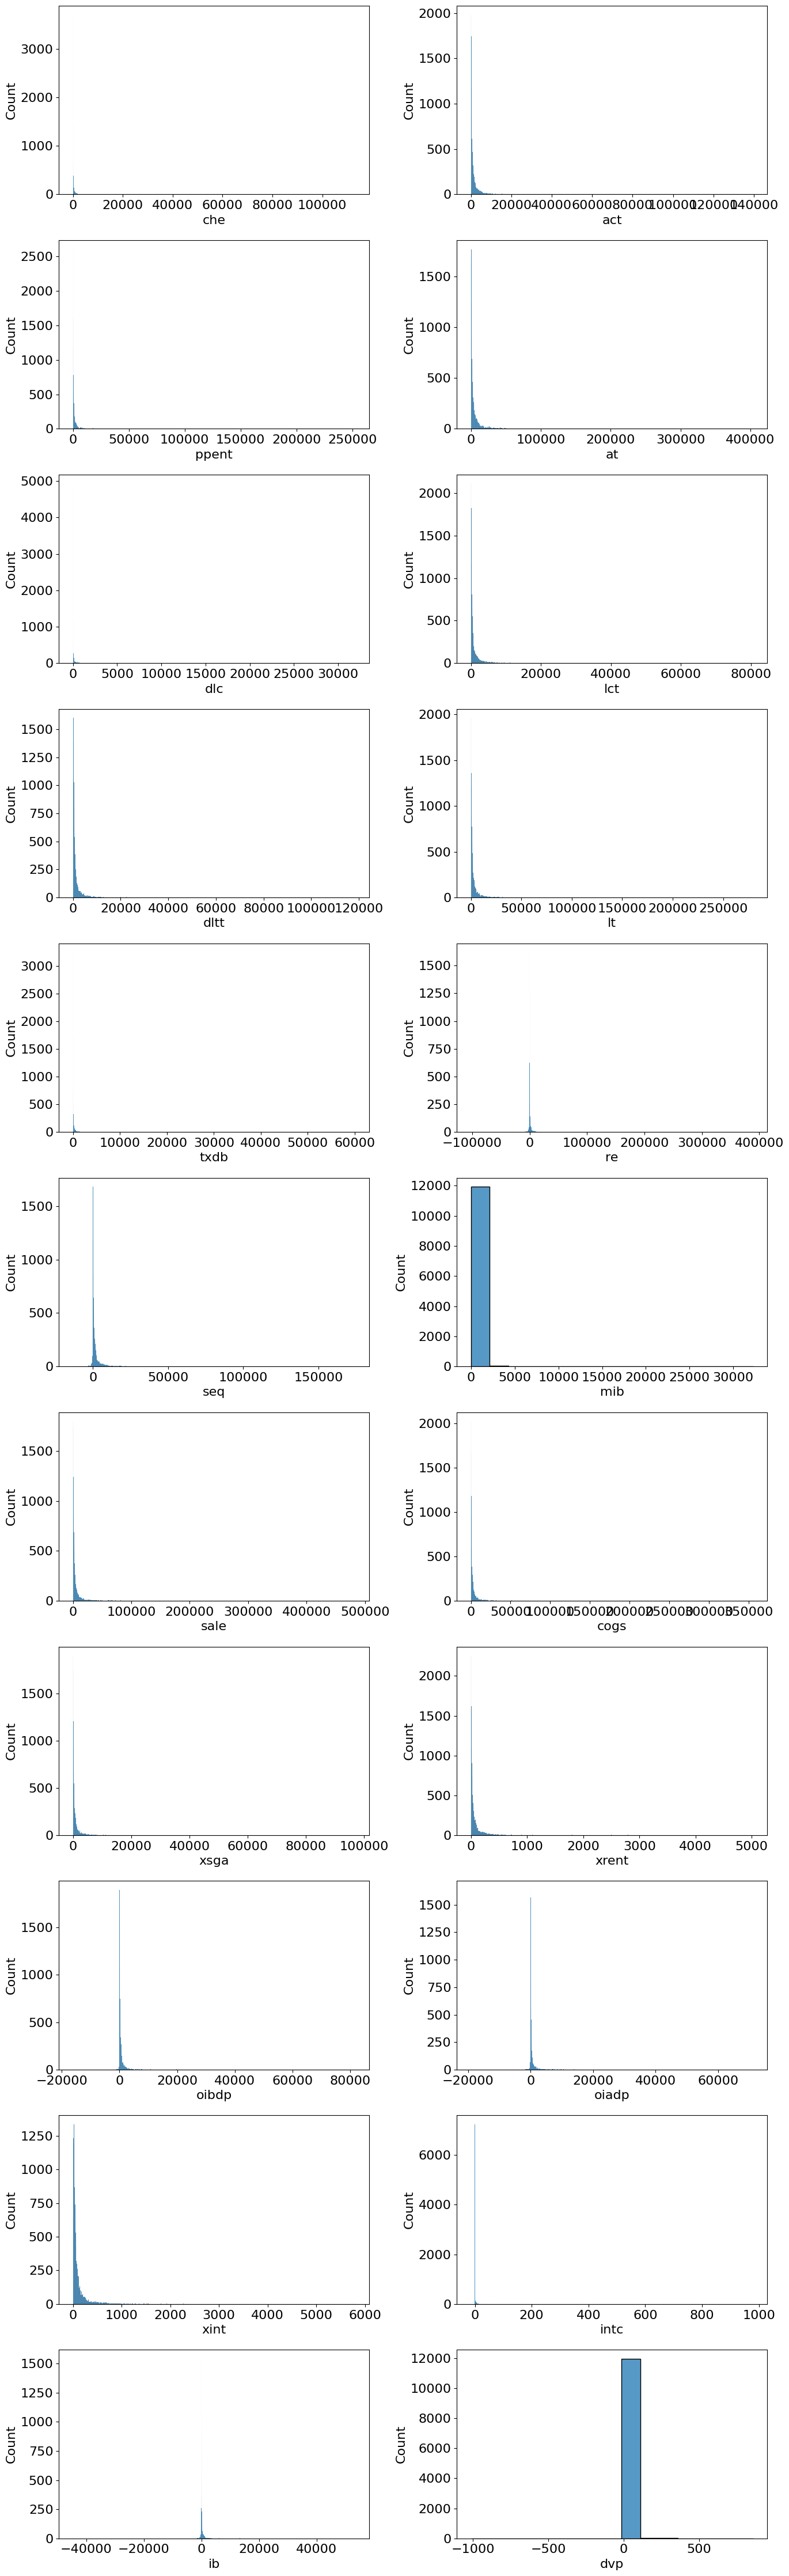

In [40]:
fig,ax=plt.subplots(11,2,figsize=(14,45))
ax=np.ravel(ax)
for i,f in enumerate(float_list):
    if f=='table':
        sns.histplot(df_train[f],discrete=True,ax=ax[i])
    else:
        sns.histplot(df_train[f],discrete=False,ax=ax[i])


plt.tight_layout();

*    Most companies have lower levels of cash, assets, and liabilities, but there is variability in the dataset with a few companies having significantly higher amounts.
*   The long tails in some histograms suggest the presence of outliers or that a small number of companies have much larger values for certain financial measures.
*   Variables with most of their counts near zero indicate that those particular financial aspects are not common or are typically very low for most companies in the dataset.

The extremely long right tails (i.e., right-skew) is going to make things difficult to see. Let's start working with logarithms.

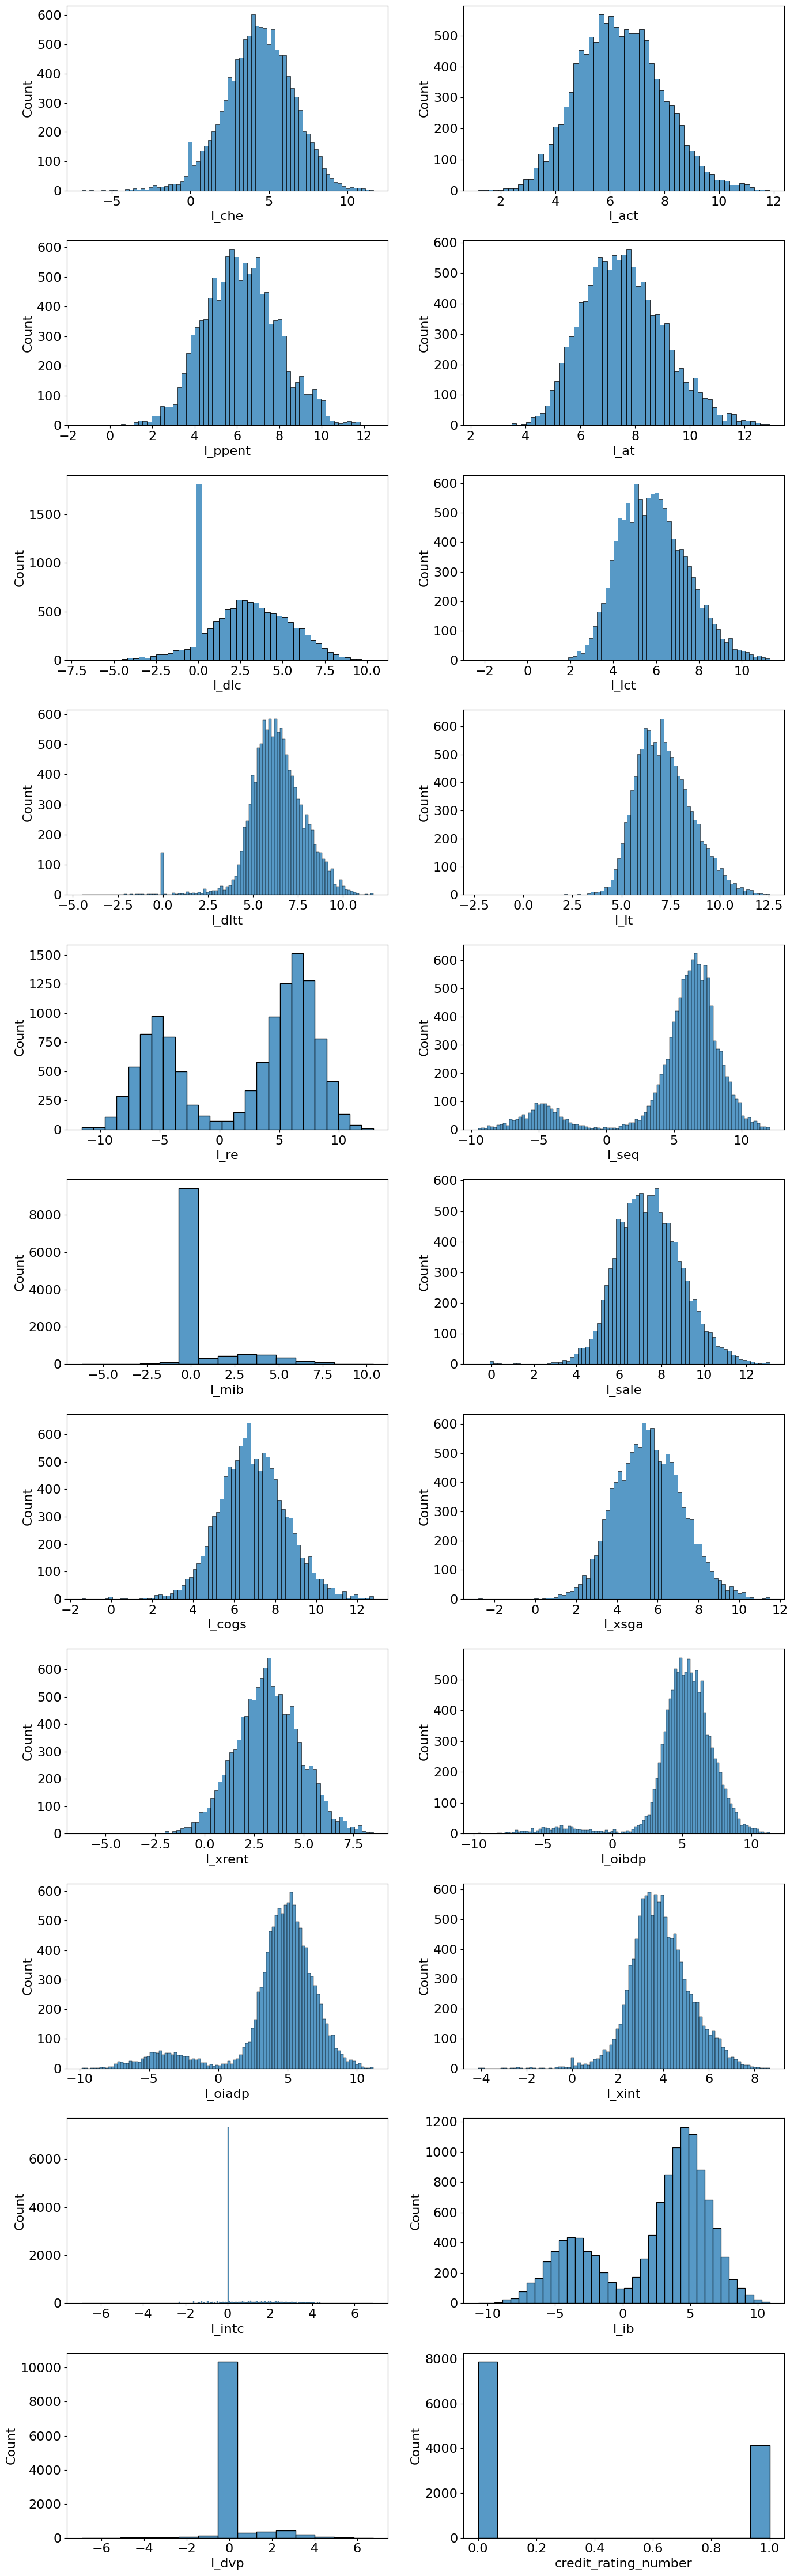

In [41]:
fig,ax=plt.subplots(11,2,figsize=(14,45))
ax=np.ravel(ax)
for i,f in enumerate(lfloat_list):
    if f=='table':
        sns.histplot(df_train[f],discrete=True,ax=ax[i])
    else:
        sns.histplot(df_train[f],discrete=False,ax=ax[i])


plt.tight_layout();

*   Many of the histograms, such as those for l_che, l_act, l_ppent, l_at, l_lct, l_lt, and l_sale, exhibit a bell-shaped curve that resembles a normal distribution, which is an indication that the underlying data doesn't have significant skewness after the transformation.
*   Overall, these histograms suggest that the data has been successfully transformed to approximate a normal distribution for many of the variables, which can help improve the performance of many statistical and machine learning models.





Correlation matrix

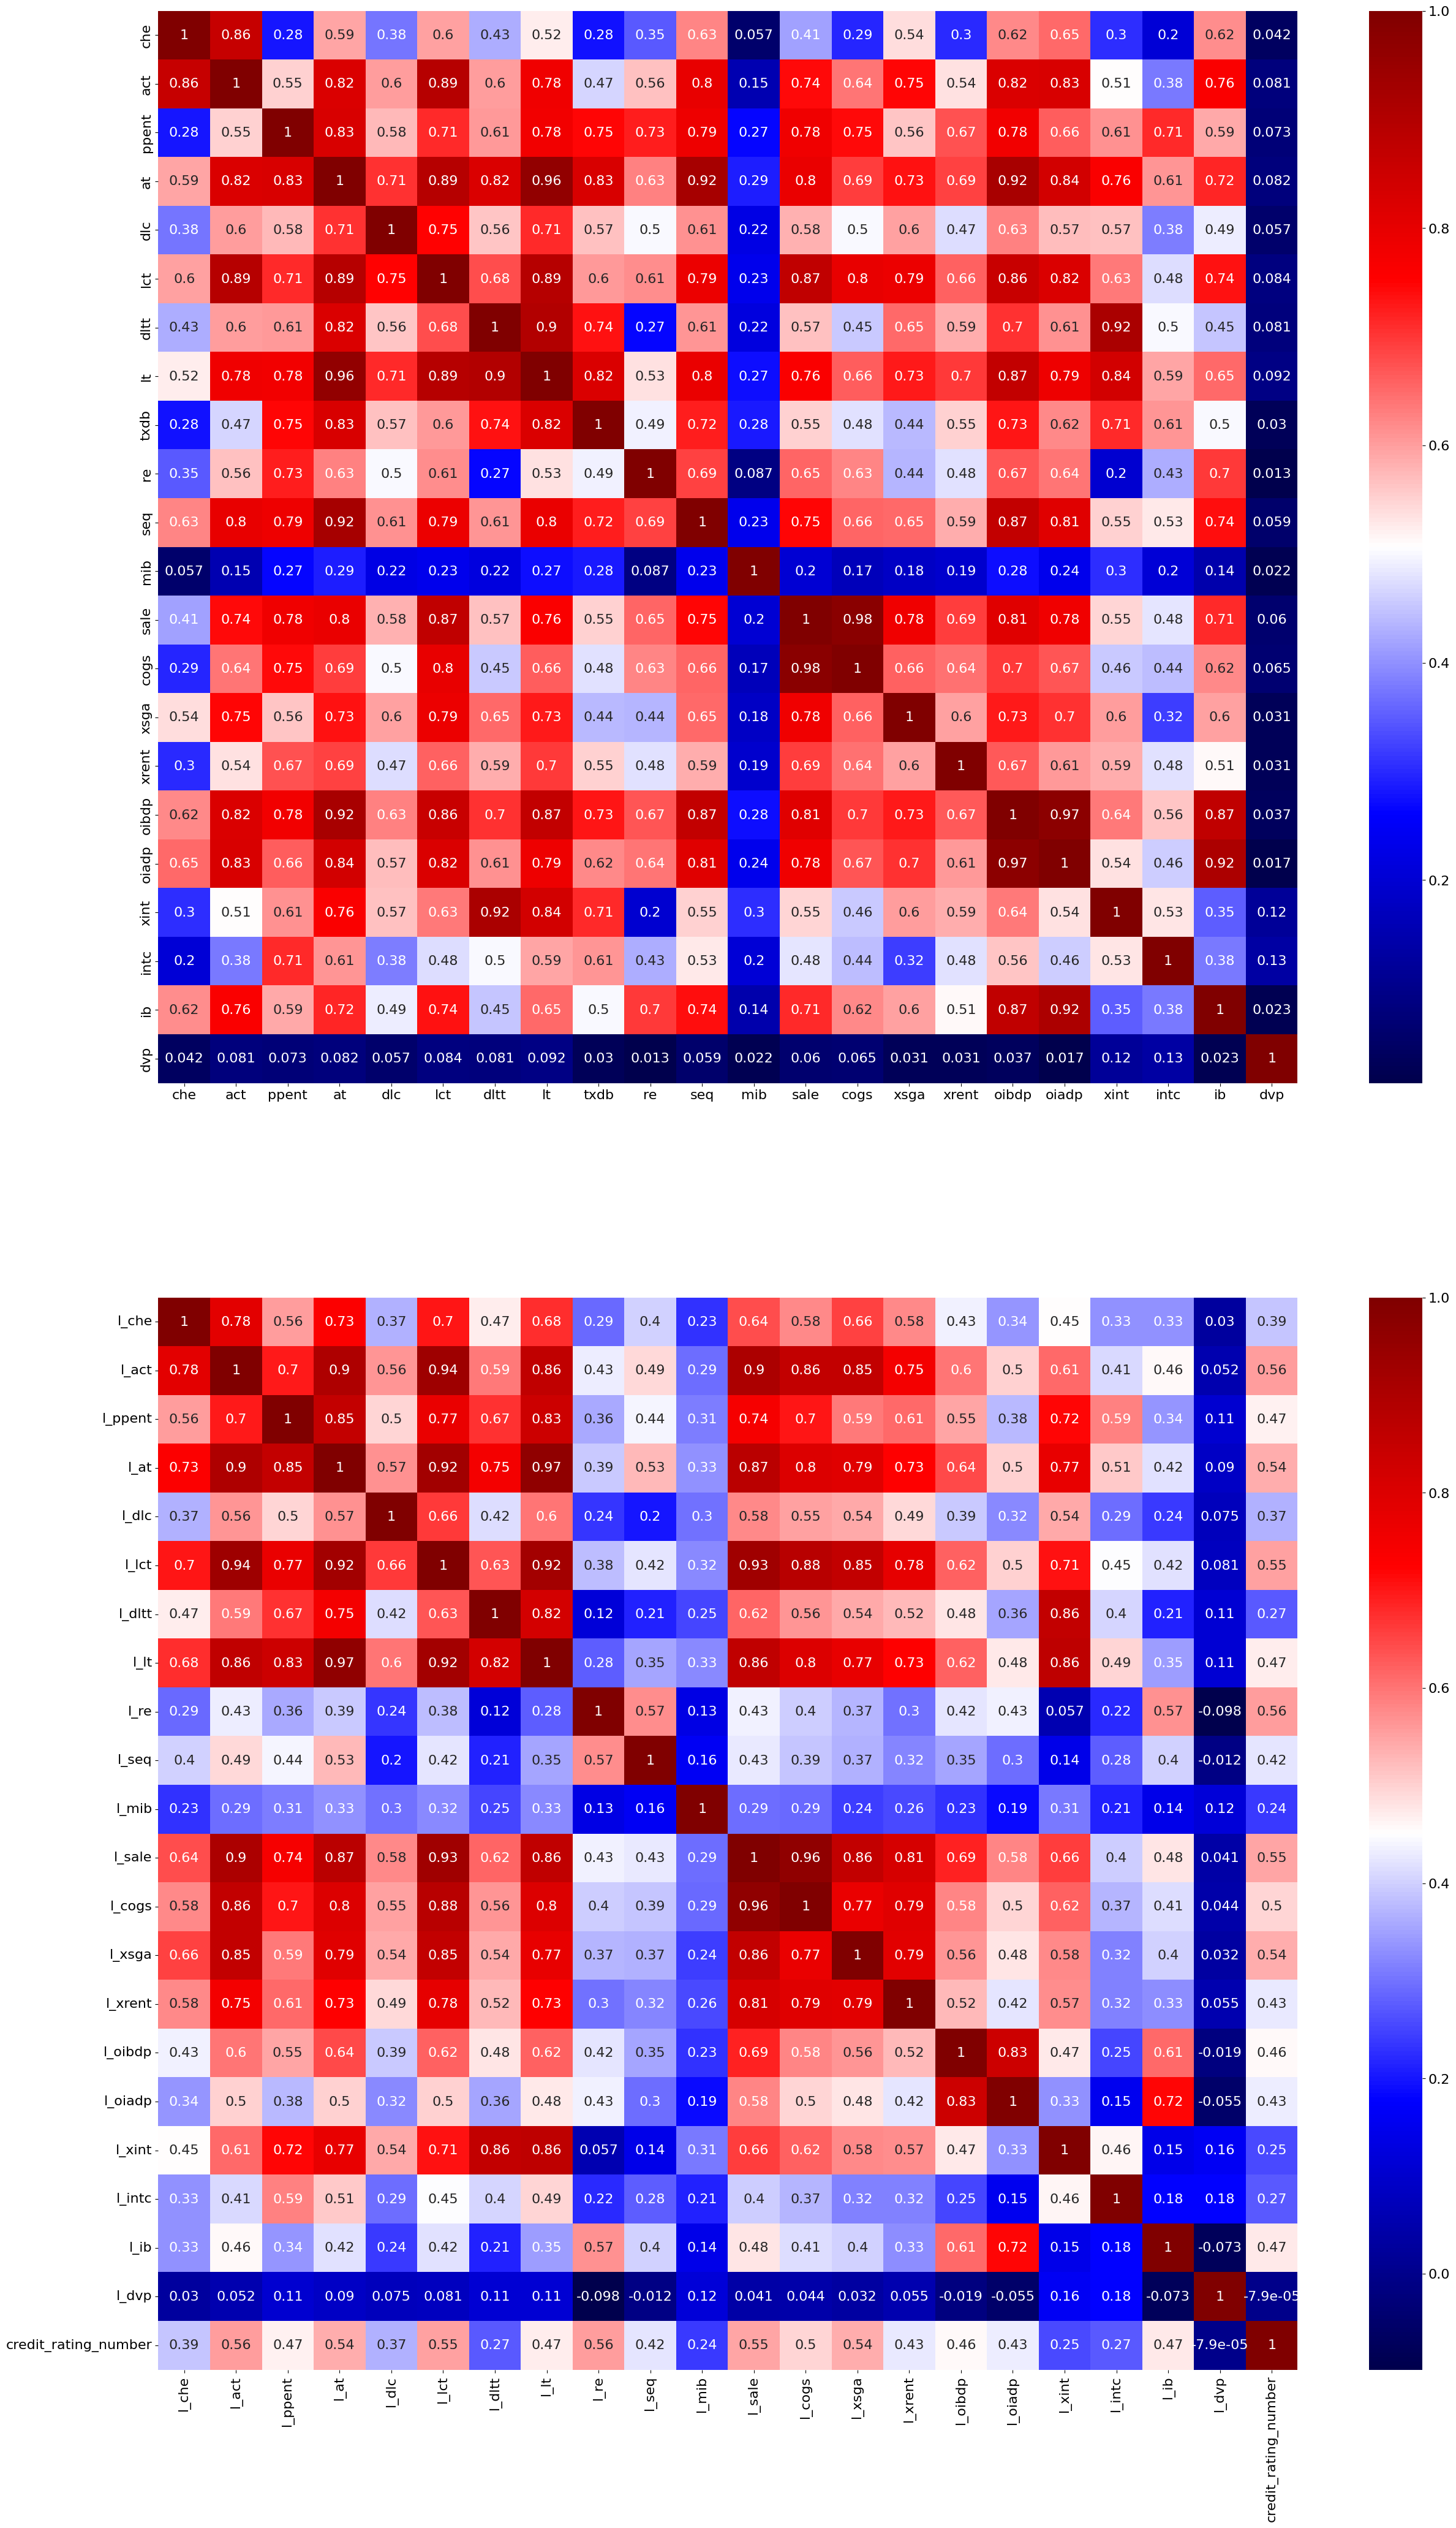

In [42]:
fig,ax=plt.subplots(2,1,figsize=(30,50))
c = df_train[float_list].corr()
sns.heatmap(c,annot=True,cmap='seismic',ax=ax[0])
c = df_train[lfloat_list].corr()
sns.heatmap(c,annot=True,cmap='seismic',ax=ax[1]);

Minority Interest (mib) and Preferred Dividends (dvps) have very weak correlations with other variables.

# **Problem 4**

# **4.1 Logit Model**

## a. Interpret your results, both economic relations and predictive abilit

**First, we put all the logarithmic variables and financial ratio variables into the logit model.**

**Then perform regression, selecting variables with a p-value less than 0.05, to obtain the final logit model.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

vlist = ['l_che', 'l_act', 'l_ppent', 'l_at', 'l_dlc', 'l_lct', 'l_dltt',
       'l_lt', 'l_txdb', 'l_re', 'l_seq', 'l_mib', 'l_sale', 'l_cogs',
       'l_xsga', 'l_xrent', 'l_oibdp', 'l_oiadp', 'l_xint', 'l_intc', 'l_ib',
       'l_dvp', 'current_ratio', 'interest_coverage',
       'return_on_equity', 'asset_turnover', 'gross_profit_margin',
       'operating_margin', 'net_profit_margin', 'return_on_asset',
       'debt_ratio', 'credit_rating_number']

df_end = df_new[vlist]

train_df, test_df = train_test_split(df_end, test_size=0.25, random_state=42)

y_tr = train_df['credit_rating_number']
X_tr = train_df.iloc[:,0:-1]

y_test = test_df['credit_rating_number']
X_test = test_df.iloc[:,0:-1]

res = sm.Logit(y_tr,X_tr).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.318646
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     credit_rating_number   No. Observations:                11989
Model:                            Logit   Df Residuals:                    11958
Method:                             MLE   Df Model:                           30
Date:                  Wed, 10 Apr 2024   Pseudo R-squ.:                  0.5029
Time:                          23:55:24   Log-Likelihood:                -3820.2
converged:                         True   LL-Null:                       -7685.2
Covariance Type:              nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
l_che                  -0.2215      0.025     -8.960      0.000      -0.270      -0.173
l_act                  -0.2038      0.115     -1.777      0.076      -0.429       0.021
l_ppent                 0.4234      0.043      9.810      0.000       0.339       0.508
l_at                   -4.5846      0.262    -17.506      0.000      -5.098      -4.071
l_dlc                   0.0731      0.016      4.434      0.000       0.041       0.105
l_lct                   0.9320      0.132      7.060      0.000       0.673       1.191
l_dltt                  0.0311      0.046      0.669      0.503      -0.060       0.122
l_lt                    4.5528      0.316     14.411      0.000       3.934       5.172
l_txdb                  0.0724      0.017      4.377      0.000       0.040       0.105
l_re                    0.1300      0.007     18.169      0.000       0.116       0.144
l_seq                  -0.1670      0.018     -9.412      0.000      -0.202      -0.132
l_mib                   0.1545      0.018      8.582      0.000       0.119       0.190
l_sale                  0.4305      0.255      1.687      0.092      -0.070       0.931
l_cogs                 -0.2077      0.122     -1.702      0.089      -0.447       0.031
l_xsga                  0.6503      0.058     11.249      0.000       0.537       0.764
l_xrent                -0.1613      0.035     -4.608      0.000      -0.230      -0.093
l_oibdp                 0.0202      0.038      0.535      0.593      -0.054       0.094
l_oiadp                 0.1125      0.022      5.155      0.000       0.070       0.155
l_xint                 -0.8559      0.067    -12.844      0.000      -0.987      -0.725
l_intc                  0.0119      0.029      0.412      0.680      -0.045       0.068
l_ib                    0.0254      0.014      1.841      0.066      -0.002       0.052
l_dvp                  -0.0013      0.036     -0.036      0.971      -0.073       0.070
current_ratio           0.1637      0.033      4.956      0.000       0.099       0.228
interest_coverage      -0.0026      0.001     -3.573      0.000      -0.004      -0.001
return_on_equity        0.0030      0.005      0.575      0.565      -0.007       0.013
asset_turnover         -0.3033      0.102     -2.963      0.003      -0.504      -0.103
gross_profit_margin    -0.3938      0.229     -1.721      0.085      -0.842       0.055
operating_margin        0.4694      0.237      1.980      0.048       0.005       0.934
net_profit_margin      -0.2516      0.094     -2.664      0.008      -0.437      -0.067
return_on_asset         2.1431      0.654      3.278      0.001       0.862       3.424
debt_ratio            -10.7645      0.449    -23.988      0.000     -11.644      -9.885
=======================================================================================
"""

In [ ]:
significant_variable_indices = res.pvalues[res.pvalues < 0.05].index.tolist()
significant_variable_indices

['l_che',
 'l_ppent',
 'l_at',
 'l_dlc',
 'l_lct',
 'l_lt',
 'l_txdb',
 'l_re',
 'l_seq',
 'l_mib',
 'l_xsga',
 'l_xrent',
 'l_oiadp',
 'l_xint',
 'current_ratio',
 'interest_coverage',
 'asset_turnover',
 'operating_margin',
 'net_profit_margin',
 'return_on_asset',
 'debt_ratio']

The listed variables are significant in evaluating a company's credit rating because they provide a comprehensive view of a company's financial health, operational efficiency, and profitability, which are all critical factors in determining creditworthiness. Here's a brief explanation of why these variables are important:

1. `l_che` (Logarithm of Cash and Short-Term Marketable Securities): High levels of cash provide a buffer for the company to meet short-term obligations, which is favorable for credit standing.

2. `l_ppent` (Logarithm of Plant, Property, and Equipment net of Accumulated Depreciation): This represents the company's investment in long-term assets, indicating the scale of operations and the potential for future revenues.

3. `l_at` (Logarithm of Total Assets): The total assets of a company provide insight into the company's size and resource base, which can impact its borrowing capacity.

4. `l_dlc` (Logarithm of Short-Term Debt and Debt Due Within One Year): Short-term debt levels can signal the company's liquidity risk and immediate financial obligations.

5. `l_lct` (Logarithm of Total Current Liabilities): Current liabilities are obligations due within one year; higher liabilities can indicate higher risk of default.

6. `l_lt` (Logarithm of Total Liabilities): The total liabilities indicate the company's overall indebtedness and long-term financial commitments.

7. `l_txdb` (Logarithm of Deferred Taxes): Deferred taxes can affect a company's future tax liabilities and cash flow.

8. `l_re` (Logarithm of Retained Earnings): Retained earnings show how much profit is reinvested in the company, which can fund growth and reduce reliance on external financing.

9. `l_seq` (Logarithm of Total Stockholders Equity): Stockholders' equity represents the owners' claim on the company after liabilities are paid off and is indicative of the company's net worth.

10. `l_mib` (Logarithm of Minority Interest): Minority interest in a company can affect the available share of profits and control over the company.

11. `l_xsga` (Logarithm of Selling, General, and Administrative Expenses): These expenses can indicate the efficiency of operations and impact profitability.

12. `l_xrent` (Logarithm of Rental Expense): High rental expenses can reduce profitability and impact cash flows.

13. `l_oiadp` (Logarithm of Operating Income Before Depreciation): This is a measure of the company's profitability from its core operations before accounting for the cost of capital assets.

14. `l_xint` (Logarithm of Interest Expense): The cost of servicing debt, which can significantly affect net income and the ability to meet financial obligations.

Additionally, the following ratios provide further insight:

15. `current_ratio`: Measures the company's ability to pay short-term liabilities with short-term assets, indicating liquidity.

16. `interest_coverage`: The ability of the company to cover its interest expenses with its operating profit, indicating solvency.

17. `asset_turnover`: Shows how efficiently a company uses its assets to generate sales, indicating operational efficiency.

18. `operating_margin`: A profitability ratio that shows the percentage of profit a company makes from its operations before subtracting taxes and interest charges.

19. `net_profit_margin`: Indicates how much of each dollar of revenues is translated into profits, reflecting overall profitability.

20. `return_on_asset`: Reflects how efficiently the company uses its assets to generate profit, indicating asset performance.

21. `debt_ratio`: Shows the proportion of a company's assets that are financed by debt, indicating financial leverage and potential risk.

These variables, when analyzed together, can provide a comprehensive view of a company's financial stability, operational effectiveness, and profitability—all of which are critical in determining the company's ability to meet its debt obligations and, consequently, its credit rating.

In [ ]:
df_end = df_new[significant_variable_indices+['credit_rating_number']]

train_df, test_df = train_test_split(df_end, test_size=0.25, random_state=42)

y_tr = train_df['credit_rating_number']
X_tr = train_df.iloc[:,0:-1]

y_test = test_df['credit_rating_number']
X_test = test_df.iloc[:,0:-1]

res = sm.Logit(y_tr,X_tr).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.319107
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     credit_rating_number   No. Observations:                11989
Model:                            Logit   Df Residuals:                    11968
Method:                             MLE   Df Model:                           20
Date:                  Wed, 10 Apr 2024   Pseudo R-squ.:                  0.5022
Time:                          23:55:24   Log-Likelihood:                -3825.8
converged:                         True   LL-Null:                       -7685.2
Covariance Type:              nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
l_che                -0.2279      0.023    -10.076      0.000      -0.272      -0.184
l_ppent               0.4501      0.038     11.768      0.000       0.375       0.525
l_at                 -4.5254      0.201    -22.514      0.000      -4.919      -4.131
l_dlc                 0.0712      0.016      4.386      0.000       0.039       0.103
l_lct                 0.7604      0.087      8.774      0.000       0.591       0.930
l_lt                  4.7000      0.282     16.691      0.000       4.148       5.252
l_txdb                0.0733      0.016      4.481      0.000       0.041       0.105
l_re                  0.1321      0.007     18.877      0.000       0.118       0.146
l_seq                -0.1673      0.018     -9.546      0.000      -0.202      -0.133
l_mib                 0.1516      0.018      8.506      0.000       0.117       0.187
l_xsga                0.6535      0.043     15.372      0.000       0.570       0.737
l_xrent              -0.1588      0.033     -4.799      0.000      -0.224      -0.094
l_oiadp               0.1412      0.016      8.995      0.000       0.110       0.172
l_xint               -0.8506      0.063    -13.540      0.000      -0.974      -0.727
current_ratio         0.0931      0.013      7.209      0.000       0.068       0.118
interest_coverage    -0.0027      0.001     -3.694      0.000      -0.004      -0.001
asset_turnover       -0.1909      0.053     -3.633      0.000      -0.294      -0.088
operating_margin      0.2012      0.085      2.373      0.018       0.035       0.367
net_profit_margin    -0.1880      0.070     -2.702      0.007      -0.324      -0.052
return_on_asset       3.0370      0.527      5.765      0.000       2.004       4.070
debt_ratio          -10.8817      0.414    -26.306      0.000     -11.692     -10.071
=====================================================================================
"""

 b. In assessing the predictive ability of the models, what metrics do you consider? Be sure to interpret these metrics and their implications for the goal of the project – accurately classifying firms’ rating status.

**1. Accuracy rate**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

vlist = significant_variable_indices+['credit_rating_number']

df_end = df_new[vlist]

train_df, test_df = train_test_split(df_end, test_size=0.25, random_state=42)

y_tr = train_df['credit_rating_number']
X_tr = train_df.iloc[:,0:-1]

y_test = test_df['credit_rating_number']
X_test = test_df.iloc[:,0:-1]

# Instanitate
logit_cls = LogisticRegression(penalty='l2', #l2 default, Ridge regularization w^2
                               fit_intercept=False, # data include intercept
                               solver='newton-cg',
                               max_iter=500,
                               multi_class='ovr')

# Estimate
logit_cls.fit(X_tr,y_tr)

# Prediction
yhati = logit_cls.predict(X_tr)
print(yhati) #a series of 0s and 1s

y_pred = logit_cls.predict(X_test)

# Model score
#accuracy is defined as: (fraction of correct predictions): correct predictions / total number of data points
mod_score = logit_cls.score(X_tr,y_tr)
print(f"Model score: {mod_score:.2%}")


[0 1 0 ... 1 0 0]
Model score: 85.78%


## Cross-validation

Use k-fold cross-validation to estimate:

1. predicted values (`predict`)
2. scores (`decision_function`) aka "fitted values"


In [ ]:
num_folds = 3

yhat = cross_val_predict(logit_cls, X_tr, y_tr, cv = num_folds, method='predict')
shat = cross_val_predict(logit_cls, X_tr, y_tr, cv = num_folds, method='decision_function')

m = (yhati != yhat).sum() #yhati is the 0/1 probability guess from the full logistic model on the training set
print(f"Different predictions: {m:,} ({m/len(yhat):.2%})")

cv_score = cross_val_score(logit_cls, X_tr, y_tr, cv=num_folds, scoring='accuracy')
print(cv_score)
print(f"CV avg model scores: {cv_score.mean():.2%}")
print(f"CV min model scores: {cv_score.min():.2%}")
print(f"CV max model scores: {cv_score.max():.2%}")
print(shat)

Different predictions: 117 (0.98%)
[0.85814361 0.86011011 0.85285285]
CV avg model scores: 85.70%
CV min model scores: 85.29%
CV max model scores: 86.01%
[-1.54525736  1.28101121 -1.9133315  ...  4.66237493 -4.19336326
 -4.05765536]


The scores seems good, indicating a relatively accurate predict model.

**2. Confusion matrix**

<table>
    <tr>
        <td> </td>
        <td colspan="2"><center>Predicted</center></td>
    </tr>
    <tr>
        <td>Actual</td>
        <td><center>0</center></td>
        <td><center>1</center></td>
    </tr>
    <tr>
        <td><center>0</center></td>
        <td>True Negative</td>
        <td>False Positive</td>
    </tr>
    <tr>
        <td><center>1</center></td>
        <td>False Negative</td>
        <td>True Positive</td>
    </tr>
</table>

Interpretation:

- "Positive" and "Negative" are interpreted in light of the prediction.
    - Positive refers to $\hat{y} = 1$
    - Negative refers to $\hat{y} = 0$.
- "True" and "False" refer to the accuracy of the prediction
    - "True Positive" refers to a prediction $\hat{y}=1$ that is correct $y=1$
    - "False Positive" refers to a prediction $\hat{y}=1$ that is incorrect $y=0$
    - "True Negative" refers to a prediction $\hat{y}=0$ that is correct $y=0$
    - "False Negative" refers to a prediction $\hat{y}=0$ that is incorrect $y=1$

In [ ]:
cm = confusion_matrix(y_test, y_pred)
# format
x = pd.DataFrame(cm).assign(rowsum = lambda x: x.sum(axis=1))
b = pd.DataFrame(x.sum(axis=0)).T
pd.concat((x,b),axis=0,ignore_index=True).rename(index={2:'colsum'}).style.format("{:,}")

,0,1,rowsum
0,"2,347",281,"2,628"
1,316,"1,053","1,369"
colsum,"2,663","1,334","3,997"


**Probability version**

In [ ]:
# joint distribution (probability matrix)
pm = cm/cm.sum()
x = pd.DataFrame(pm).assign(pact = lambda x: x.sum(axis=1))
b = pd.DataFrame(x.sum(axis=0)).T
pd.concat((x,b),axis=0,ignore_index=True).rename(index={2:'ppred'}).style.format("{:.2%}")

,0,1,pact
0,58.72%,7.03%,65.75%
1,7.91%,26.34%,34.25%
ppred,66.62%,33.38%,100.00%


Evaluating the model:

1. The model has a high true negative rate, suggesting it is good at identifying class 0.
2. The true positive rate is moderate, indicating room for improvement in identifying class 1.
3. The false positive and false negative rates are relatively low, but they still represent a significant number of misclassifications, especially considering that they are almost equal to the true positive rate.

## Precision

Remember the confusion matrix labels:


<table>
    <tr>
        <td> </td>
        <td colspan="2"><center>Predicted</center></td>
    </tr>
    <tr>
        <td>Actual</td>
        <td><center>0</center></td>
        <td><center>1</center></td>
    </tr>
    <tr>
        <td><center>0</center></td>
        <td>True Negative</td>
        <td>False Positive</td>
    </tr>
    <tr>
        <td><center>1</center></td>
        <td>False Negative</td>
        <td>True Positive</td>
    </tr>
</table>



\begin{eqnarray}
    Precision = \frac{True Positives}{True Positives + False Positives}
\end{eqnarray}

So, precision tells us the probability of being correct when the model predicts a positive (i.e., "1") outcome. But this is just the probability of a realized "1" conditional on predicting "1", $P(y=1|\hat{1})$.



In [ ]:
# Precision
precision  = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2%}")

Precision: 78.94%


A precision of 78.94% indicates that when the model predicts a positive outcome, it is correct approximately 78.94% of the time. This is a relatively high precision score, suggesting that the model's positive predictions are quite reliable.

## Recall

<table>
    <tr>
        <td> </td>
        <td colspan="2"><center>Predicted</center></td>
    </tr>
    <tr>
        <td>Actual</td>
        <td><center>0</center></td>
        <td><center>1</center></td>
    </tr>
    <tr>
        <td><center>0</center></td>
        <td>True Negative</td>
        <td>False Positive</td>
    </tr>
    <tr>
        <td><center>1</center></td>
        <td>False Negative</td>
        <td>True Positive</td>
    </tr>
</table>

\begin{eqnarray}
    Recall = \frac{True Positives}{True Positives + False Negatives}
\end{eqnarray}
Recall (a.k.a., sensitivity, true positive rate) tells us the probability of correctly predicting a  positive outcome (i.e., $\hat{y}$=1) having observed a positive outcome. But this is just the probability of predicting 1 when we observe one, $P(\hat{1}|y=1)$.


In [ ]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2%}")

Recall: 76.92%



A recall of 76.92% indicates that the model correctly identifies approximately 76.92% of all positive instances in the dataset. This suggests that the model's ability to capture positive instances is relatively high.

## $F_1$ score

This is the harmonic mean of precision and recall, which is like a weighted average in which lower values are given more weight. So, if either precision or recall is particularly low, that will have an outsized impact on the $F_1$ score.

\begin{equation}
    F_1 = \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}} = 2\times \frac{Precision \times Recall}{Precision + Recall} = \frac{True Positive}{True Positive + \frac{False Negative + True Positive}{2}}
\end{equation}

$F_1$ favors predictors that have similar precision and recall.

In [ ]:
f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1:.2%}")

F1 score: 77.91%


An F1 score of 77.91% indicates a relatively good balance between precision and recall in a binary classification task. It suggests that the model has decent performance in terms of both correctly identifying positive instances (precision) and capturing all positive instances (recall).

## ROC Curve

The receiver operating characteristic (ROC) curve plots the true positive rate (i.e., recall) against the false positive rate (i.e., the probability of predicting 1 conditional on a 0 actual, aka "fall-out"). I.e.,

\begin{eqnarray*}
    \text{True Positive Rate} = P(\hat{y}=1|y=1) \\
    \text{False Positive Rate} = P(\hat{y}=1|y=0)
\end{eqnarray*}

A random classifier is the 45 degree line in the figure.
Higher threshold will lower the recall/TPR

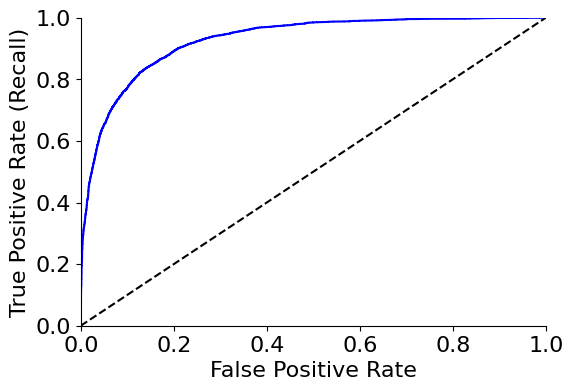

In [ ]:
fpr, tpr, thresh = roc_curve(y_tr,shat)

fig,ax=plt.subplots(1,1,figsize=(6,4))

# format
ax.plot(fpr,tpr,'b-')
ax.plot([0,1],[0,1],'k--')
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate (Recall)")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.margins(0);

### AUC Score

The area under the ROC curve (AUC) ranges from 0.5 (random classifier) to 1.0 (perfect classifier).

In [ ]:
auc = roc_auc_score(y_tr,shat)
auc

0.9271482425350167

AUC (Area Under the Curve) is a metric used to evaluate the performance of a classification model. A score of 0.9271482425350167 indicates that the model has a very high ability to distinguish between the positive and negative classes. In other words, it suggests that the model has a strong discriminatory power and performs well in classifying instances correctly.

### **Error Analysis**

c. Assuming your model has some egregious errors (e.g., classifying an AA-rated firm as speculative-grade), can you perform an error analysis to see why it is making this mistake(s) and what might be missing from your model.

In [ ]:
yhat_test = logit_cls.predict(X_test)
yprob_test = logit_cls.predict_proba(X_test)

test_df['yhat_test'] = yhat_test
test_df[['yprob_0','yprob_1']] = yprob_test

error_df = test_df[y_test != yhat_test]
error_df

l_che   l_ppent      l_at     l_dlc     l_lct      l_lt    l_txdb  \
21666  5.409917  8.137276  8.531163  4.538389  6.511445  8.166803  6.404342   
16764  1.970045  6.294478  7.034866  4.708277  6.285139  6.682581  1.964451   
12669  4.691348  6.527958  7.710653  3.988984  6.444131  7.105786  2.079442   
24172  3.949666  4.075790  6.665744  0.000000  5.497549  6.261316  3.782802   
20911  4.756027  6.412450  7.505178  4.955285  6.042892  7.050653  4.491632   
...         ...       ...       ...       ...       ...       ...       ...   
806    8.078998  5.762051  8.548886  0.000000  7.345365  7.629004  5.337538   
9486   5.288267  6.133398  7.439148  5.513429  6.447623  7.043160  0.000000   
993    7.104965  7.707063  9.179572  5.241747  7.103322  8.784468  4.234107   
1427   3.063765  4.960934  7.819968  0.117783  7.307595  7.555309  1.249615   
6618   0.898127  4.294042  6.094574  2.131915  4.804144  5.454936  1.852384   

           l_re     l_seq     l_mib  ...  interest_coverage  asset_turnover  \
21666  5.995979  7.111223  5.776497  ...           4.174886        0.423709   
16764  4.923937  5.820575  0.000000  ...           4.389706        2.420546   
12669  6.498282  6.920672  0.000000  ...           8.146341        1.951613   
24172  5.014900  5.565053  0.000000  ...          23.069560        1.293507   
20911  5.305889  6.472811  2.804269  ...           8.025422        0.906995   
...         ...       ...       ...  ...                ...             ...   
806    7.380879  8.040447  0.000000  ...          10.021277        1.188529   
9486   6.945340  6.321308  0.000000  ...           4.360329        1.158937   
993    7.792762  8.115820  0.000000  ...           4.903743        0.510261   
1427   6.070606  6.361244  0.000000  ...           6.419092        3.993330   
6618   5.157048  5.344891  0.000000  ...           6.771380        1.765382   

       operating_margin  net_profit_margin  return_on_asset  debt_ratio  \
21666          0.251016          -0.293643        -0.124419    0.694641   
16764          0.057898           0.016139         0.039064    0.703079   
12669          0.076676           0.024564         0.047939    0.546147   
24172          0.180610           0.092310         0.119403    0.667359   
20911          0.056495           0.012350         0.011201    0.634750   
...                 ...                ...              ...         ...   
806            0.076785           0.097978         0.116450    0.398566   
9486           0.188416           0.076584         0.088756    0.673015   
993            0.185327           0.000404         0.000206    0.673610   
1427           0.019478           0.007396         0.029533    0.767467   
6618           0.061291           0.022196         0.039184    0.527484   

       credit_rating_number  yhat_test   yprob_0   yprob_1  
21666                     0          1  0.430702  0.569298  
16764                     0          1  0.459527  0.540473  
12669                     0          1  0.373920  0.626080  
24172                     1          0  0.719391  0.280609  
20911                     0          1  0.388931  0.611069  
...                     ...        ...       ...       ...  
806                       0          1  0.222995  0.777005  
9486                      1          0  0.500990  0.499010  
993                       0          1  0.405674  0.594326  
1427                      1          0  0.696269  0.303731  
6618                      1          0  0.610394  0.389606  

[597 rows x 25 columns]

### Precision-Recall vs Threshold

Compute the precision and recall curves for different score thresholds using the true outcomes `y_tr` and the estimated scores from the cross-validation, `shat`.

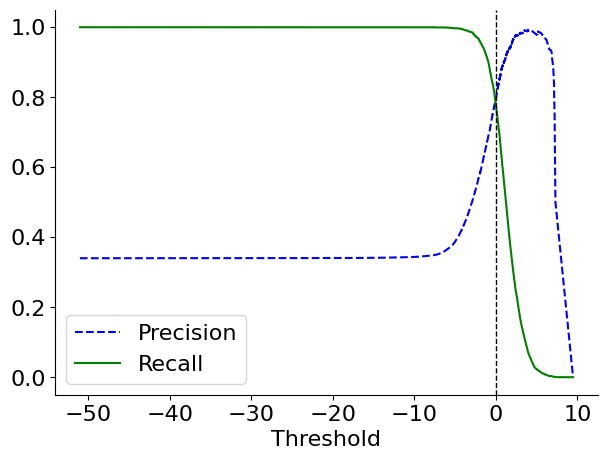

In [ ]:
p,r,t = precision_recall_curve(y_tr,shat) #precision, recall, threshold

fig,ax=plt.subplots(1,1,figsize=(7,5))

# format
ax.plot(t,p[:-1],'b--',label="Precision")
ax.plot(t,r[:-1],'g-',label="Recall")
ax.set_xlabel("Threshold")
ax.axvline(0,0,1,color='k',linewidth=1,linestyle='--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend();

Optimal threshold
Ifourr primary concern is precision, where mightweu set the threshold?

In [ ]:
maxp = p[:-1].max()
maxt = t[p[:-1].argmax()] #. maxt is assigned the value in the treshold t at the index where precision p (excluding its last element) has its maximum value.
print(f"Maximum precision = {maxp:.4f}; threshold score = {maxt:,.2f}")

Maximum precision = 0.9930; threshold score = 3.98


Mean and Standard deviation of features of error samples

We conduct two statistical test to determine whether there is a significant differences between mean and variance of erroe samples and tesr samples.

If there is a significant differences, the corresponding feature is what we might underestimate.

In [ ]:
from re import X
error_features = error_df.drop(columns=['yhat_test', 'yprob_0', 'yprob_1'])
mean_features = error_features.mean()
std_features = error_features.std()

X_test = test_df.iloc[:,0:-1]
mean_features_true = X_test.mean()
std_features_true = X_test.std()

print("Mean features of error samples:")
print(mean_features)
print("\nStandard deviation of features of error samples:")
print(std_features)

print("Mean features of test samples:")
print(mean_features)
print("\nStandard deviation of features of test samples:")
print(std_features)

Mean features of error samples:
l_che                    4.607513
l_ppent                  6.654355
l_at                     7.991026
l_dlc                    2.814106
l_lct                    6.291776
l_lt                     7.459558
l_txdb                   3.781900
l_re                     4.716520
l_seq                    6.632490
l_mib                    0.863765
l_xsga                   5.839605
l_xrent                  3.529673
l_oiadp                  4.819120
l_xint                   3.885125
current_ratio            1.918552
interest_coverage       24.115577
asset_turnover           1.144665
operating_margin        -0.574720
net_profit_margin       -0.854546
return_on_asset          0.039800
debt_ratio               0.615052
credit_rating_number     0.529313
dtype: float64

Standard deviation of features of error samples:
l_che                     2.068342
l_ppent                   1.436803
l_at                      1.109587
l_dlc                     2.378376
l_lct          

In [ ]:
import pandas as pd
from scipy import stats

df1 = error_df
df2 = X_test

results = []
for column in X_test.columns:
    # Welch's t-test
    t_stat, t_p_value = stats.ttest_ind(X_test[column].dropna(), error_df[column].dropna(), equal_var=False)

    # Levene's test for equal variances
    levene_stat, levene_p_value = stats.levene(X_test[column].dropna(), error_df[column].dropna())

    results.append({
        'Column': column,
        'T-Statistic': t_stat,
        'T-p-Value': t_p_value,
        'Levene-Statistic': levene_stat,
        'Levene-p-Value': levene_p_value
    })

results_df = pd.DataFrame(results)
results_df


Column  T-Statistic     T-p-Value  Levene-Statistic  \
0                  l_che    -2.976508  3.002580e-03          2.048207   
1                l_ppent    -7.596606  7.713812e-14         37.373144   
2                   l_at    -8.106609  1.606963e-15         78.475901   
3                  l_dlc    -0.627464  5.305334e-01          0.161352   
4                  l_lct    -7.211409  1.141279e-12         74.027017   
5                   l_lt    -5.265687  1.761508e-07         34.507218   
6                 l_txdb    -5.464607  6.202111e-08          7.042372   
7                   l_re   -13.808769  1.202786e-39        236.142557   
8                  l_seq   -12.716979  8.323704e-35         90.856142   
9                  l_mib    -1.917168  5.558392e-02          3.005621   
10                l_xsga    -4.400728  1.207263e-05         51.971351   
11               l_xrent    -4.909556  1.095498e-06         19.002802   
12               l_oiadp    -4.664374  3.603055e-06         31.848994   
13                l_xint    -0.367257  7.135288e-01          0.883814   
14         current_ratio    -0.055965  9.553821e-01          0.007613   
15     interest_coverage    -0.681252  4.958602e-01          0.142996   
16        asset_turnover    -0.938754  3.481609e-01          9.021103   
17      operating_margin     0.893477  3.719448e-01          1.761825   
18     net_profit_margin     0.843957  3.990159e-01          1.587395   
19       return_on_asset    -6.656590  4.098696e-11         13.472793   
20            debt_ratio    11.370571  2.203241e-28         52.850574   
21  credit_rating_number    -8.576892  5.374849e-17         37.363520   
22             yhat_test    -6.291908  5.281375e-10         43.108560   
23               yprob_0    11.127688  3.328196e-27         99.284662   

    Levene-p-Value  
0     1.524536e-01  
1     1.056435e-09  
2     1.137653e-18  
3     6.879333e-01  
4     1.043390e-17  
5     4.546483e-09  
6     7.987785e-03  
7     5.267925e-52  
8     2.431203e-21  
9     8.304328e-02  
10    6.553044e-13  
11    1.333810e-05  
12    1.766542e-08  
13    3.472087e-01  
14    9.304740e-01  
15    7.053379e-01  
16    2.683196e-03  
17    1.844631e-01  
18    2.077627e-01  
19    2.447969e-04  
20    4.209227e-13  
21    1.061619e-09  
22    5.752816e-11  
23    3.751688e-23

In [ ]:
results_df[(results_df['T-p-Value']<0.05)]

Column  T-Statistic     T-p-Value  Levene-Statistic  \
0                  l_che    -2.976508  3.002580e-03          2.048207   
1                l_ppent    -7.596606  7.713812e-14         37.373144   
2                   l_at    -8.106609  1.606963e-15         78.475901   
4                  l_lct    -7.211409  1.141279e-12         74.027017   
5                   l_lt    -5.265687  1.761508e-07         34.507218   
6                 l_txdb    -5.464607  6.202111e-08          7.042372   
7                   l_re   -13.808769  1.202786e-39        236.142557   
8                  l_seq   -12.716979  8.323704e-35         90.856142   
10                l_xsga    -4.400728  1.207263e-05         51.971351   
11               l_xrent    -4.909556  1.095498e-06         19.002802   
12               l_oiadp    -4.664374  3.603055e-06         31.848994   
19       return_on_asset    -6.656590  4.098696e-11         13.472793   
20            debt_ratio    11.370571  2.203241e-28         52.850574   
21  credit_rating_number    -8.576892  5.374849e-17         37.363520   
22             yhat_test    -6.291908  5.281375e-10         43.108560   
23               yprob_0    11.127688  3.328196e-27         99.284662   

    Levene-p-Value  
0     1.524536e-01  
1     1.056435e-09  
2     1.137653e-18  
4     1.043390e-17  
5     4.546483e-09  
6     7.987785e-03  
7     5.267925e-52  
8     2.431203e-21  
10    6.553044e-13  
11    1.333810e-05  
12    1.766542e-08  
19    2.447969e-04  
20    4.209227e-13  
21    1.061619e-09  
22    5.752816e-11  
23    3.751688e-23

In [ ]:
results_df[(results_df['Levene-p-Value']<0.05)]

Column  T-Statistic     T-p-Value  Levene-Statistic  \
1                l_ppent    -7.596606  7.713812e-14         37.373144   
2                   l_at    -8.106609  1.606963e-15         78.475901   
4                  l_lct    -7.211409  1.141279e-12         74.027017   
5                   l_lt    -5.265687  1.761508e-07         34.507218   
6                 l_txdb    -5.464607  6.202111e-08          7.042372   
7                   l_re   -13.808769  1.202786e-39        236.142557   
8                  l_seq   -12.716979  8.323704e-35         90.856142   
10                l_xsga    -4.400728  1.207263e-05         51.971351   
11               l_xrent    -4.909556  1.095498e-06         19.002802   
12               l_oiadp    -4.664374  3.603055e-06         31.848994   
16        asset_turnover    -0.938754  3.481609e-01          9.021103   
19       return_on_asset    -6.656590  4.098696e-11         13.472793   
20            debt_ratio    11.370571  2.203241e-28         52.850574   
21  credit_rating_number    -8.576892  5.374849e-17         37.363520   
22             yhat_test    -6.291908  5.281375e-10         43.108560   
23               yprob_0    11.127688  3.328196e-27         99.284662   

    Levene-p-Value  
1     1.056435e-09  
2     1.137653e-18  
4     1.043390e-17  
5     4.546483e-09  
6     7.987785e-03  
7     5.267925e-52  
8     2.431203e-21  
10    6.553044e-13  
11    1.333810e-05  
12    1.766542e-08  
16    2.683196e-03  
19    2.447969e-04  
20    4.209227e-13  
21    1.061619e-09  
22    5.752816e-11  
23    3.751688e-23

**The above variables exhibit significant differences in means and variances between the misclassified data and the test set, suggesting that these variables should be given more attention during model training.**

## **4.2 SGD Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

vlist = significant_variable_indices+['credit_rating_number']
df_end = df_new[vlist]

train_df, test_df = train_test_split(df_end, test_size=0.25, random_state=42)

y_tr = train_df['credit_rating_number']
X_tr = train_df.iloc[:,0:-1]
y_test = test_df['credit_rating_number']
X_test = test_df.iloc[:,0:-1]

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_test = scaler.transform(X_test)

model = SGDClassifier(loss='log', penalty='l2', alpha=0.0001, random_state=42, max_iter=1000, tol=1e-3)
model.fit(X_tr, y_tr)

params = model.get_params()
for param_name, param_value in params.items():
    print(param_name, ":", param_value)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

alpha : 0.0001
average : False
class_weight : None
early_stopping : False
epsilon : 0.1
eta0 : 0.0
fit_intercept : True
l1_ratio : 0.15
learning_rate : optimal
loss : log
max_iter : 1000
n_iter_no_change : 5
n_jobs : None
penalty : l2
power_t : 0.5
random_state : 42
shuffle : True
tol : 0.001
validation_fraction : 0.1
verbose : 0
warm_start : False
Accuracy: 0.8416312234175631


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


**ROC and AUC**

AUC: 0.9271482425350167


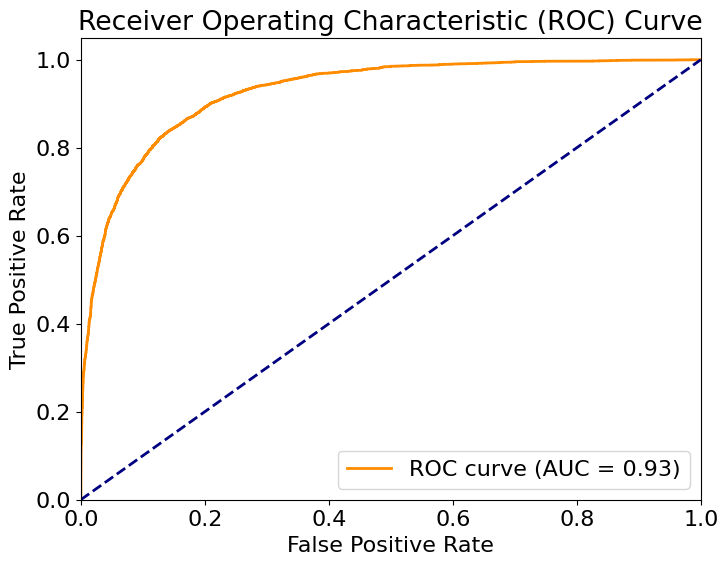

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresh = roc_curve(y_tr,shat)
roc_auc = auc(fpr, tpr)
print('AUC:',roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Precision, recall and F1 score**

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.7666666666666667
Recall: 0.7728268809349891


In [ ]:
f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1:.2%}")

F1 score: 76.97%


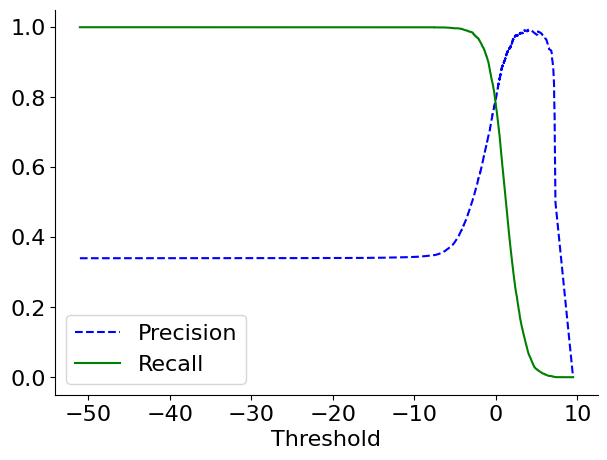

In [ ]:
p,r,t = precision_recall_curve(y_tr,shat)

fig,ax=plt.subplots(1,1,figsize=(7,5))

# format
ax.plot(t,p[:-1],'b--',label="Precision")
ax.plot(t,r[:-1],'g-',label="Recall")
ax.set_xlabel("Threshold")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend();

In [ ]:
maxp = p[:-1].max()
maxt = t[p[:-1].argmax()]
print(f"Maximum precision = {maxp:.4f}; threshold score = {maxt:,.2f}")

Maximum precision = 0.9930; threshold score = 3.98


**Cross validation**

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
num_folds = 3
yhat = cross_val_predict(model, X_tr, y_tr, cv = num_folds, method='predict')
shat = cross_val_predict(model, X_tr, y_tr, cv = num_folds, method='decision_function')
assert yhat.shape[0] == X_tr.shape[0] == y_tr.shape[0]
yhati = model.predict(X_tr)
m = (yhati != yhat).sum() #yhati is the 0/1 probability guess from the full logistic model on the training set
print(f"Different predictions: {m:,} ({m/len(yhat):.2%})")

cv_score = cross_val_score(model, X_tr, y_tr, cv=num_folds, scoring='accuracy')
print(cv_score)
print(f"CV avg model scores: {cv_score.mean():.2%}")
print(f"CV min model scores: {cv_score.min():.2%}")
print(f"CV max model scores: {cv_score.max():.2%}")
print(shat)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Different predictions: 713 (5.95%)
[0.85939455 0.85335335 0.85035035]
CV avg model scores: 85.44%
CV min model scores: 85.04%
CV max model scores: 85.94%
[-2.64385806  2.01015789 -3.50038302 ...  3.59974304 -4.47190312
 -4.66222799]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


**Confusion metrics**

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

x = pd.DataFrame(cm).assign(rowsum=lambda x: x.sum(axis=1))
b = pd.DataFrame(x.sum(axis=0)).T
confusion_matrix_df = pd.concat((x, b), axis=0, ignore_index=True).rename(index={x.shape[0]: 'colsum'})
print("Confusion Matrix:")
print(confusion_matrix_df.style.format("{:,}"))

pm = cm / cm.sum()
x = pd.DataFrame(pm).assign(pact=lambda x: x.sum(axis=1))
b = pd.DataFrame(x.sum(axis=0)).T
pd.concat((x, b), axis=0, ignore_index=True).rename(index={x.shape[0]: 'ppred'})


Confusion Matrix:


0         1      pact
0      0.576933  0.080560  0.657493
1      0.077808  0.264699  0.342507
ppred  0.654741  0.345259  1.000000

## Interpretation of the results:

### **Predictive ability**
The accuracy score of 0.8416 indicates that the trained `SGDClassifier` model correctly predicts the credit rating category for approximately 84% of the companies in the test dataset. This suggests that the model has a good predictive ability and can effectively classify companies into different credit rating categories based on their financial variables.

### **ROC**
The ROC curve suggests that the binary classifier being evaluated has a very good discriminatory power, with an AUC of 0.9271. It performs significantly better than random guessing and can effectively distinguish between positive and negative cases across a range of classification thresholds.

### **Precision, recall and F1 score**
| Metric   | Score   |
|----------|---------|
| Precision| 0.7667  |
| Recall   | 0.7728  |
| F1 Score | 0.7697  |


&#8226; Precision: This metric indicates the proportion of correctly identified positive cases out of all cases that were classified as positive. In this case, 76.67% of the cases identified as positive were actually positive.

&#8226; Recall: This metric indicates the proportion of correctly identified positive cases out of all actual positive cases. In this case, 77.28% of the actual positive cases were correctly identified by the model.

&#8226; F1 Score: This is the harmonic mean of precision and recall. It provides a balance between precision and recall. In this case, the F1 score is 76.97%, indicating a good balance between precision and recall.

### **Cross-validation**
- The model was evaluated using 3-fold cross-validation with accuracy as the scoring metric. The individual fold scores are [0.85939455 0.85335335 0.85035035], showing some variation in the model's performance across different folds.
- The cross-validation results suggest that the model has a good overall performance, with an average accuracy of 85.44%.

### **Confusion metrics**
The diagonal elements of the matrix represent the correct predictions:
   - For class 0, the model correctly predicts 57.69% of the instances.
   - For class 1, the model correctly predicts 26.46% of the instances.

The off-diagonal elements represent the misclassifications:
   - The model misclassifies 8.01% of class 0 instances as class 1.
   - The model misclassifies 7.78% of class 1 instances as class 0.

The overall accuracy of the model can be calculated by summing the diagonal elements (correct predictions). In this case, the accuracy is 57.69% + 26.46% = 84.15%.

## **Error Analysis**

In [ ]:
yhat_test = logit_cls.predict(X_test)
yprob_test = logit_cls.predict_proba(X_test)

test_df['yhat_test'] = yhat_test
test_df[['yprob_0','yprob_1']] = yprob_test

error_df = test_df[y_test != yhat_test]
error_df

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


l_che   l_ppent      l_at     l_dlc     l_lct      l_lt    l_txdb  \
17754  4.134382  5.500147  6.148849  2.602690  4.263328  5.049516  1.249902   
25244  2.424006  5.379201  6.874142  0.402126  5.080211  6.520658  1.860975   
21239  2.642124  3.100182  5.305412  0.000000  3.132882  4.885775  0.000000   
25017  1.861596  8.884714  9.093238  0.000000  6.279813  8.614678  7.211594   
16764  1.970045  6.294478  7.034866  4.708277  6.285139  6.682581  1.964451   
...         ...       ...       ...       ...       ...       ...       ...   
1427   3.063765  4.960934  7.819968  0.117783  7.307595  7.555309  1.249615   
19017  2.644826  1.485461  5.224918 -1.248273  3.107453  4.398035  2.698404   
21672  1.750243  6.212360  6.624579  2.770524  4.437532  5.959610  4.165052   
2623   3.634951  7.995037  8.776105  2.639057  6.589339  8.299609  0.000000   
17392  2.085672  4.327689  5.549064  0.826366  3.114537  4.723158  0.000000   

           l_re     l_seq     l_mib  ...  interest_coverage  asset_turnover  \
17754  3.840570  5.743743  0.000000  ...          16.934396        0.993667   
25244  3.210844  5.662683  0.000000  ...           3.867282        1.061762   
21239 -1.821480  4.119541  2.014903  ...           2.169305        0.544280   
25017  5.001393  8.126508  0.000000  ...           3.791506        0.173649   
16764  4.923937  5.820575  0.000000  ...           4.389706        2.420546   
...         ...       ...       ...  ...                ...             ...   
1427   6.070606  6.361244  0.000000  ...           6.419092        3.993330   
19017 -4.741710  4.649713  0.000000  ...           0.348848        0.420891   
21672  4.583936  5.902437  0.000000  ...          11.136033        0.406180   
2623  -5.684939  7.611595  6.072584  ...           2.640509        0.316491   
17392 -4.102263  4.970868 -1.133204  ...           3.094896        0.422838   

       operating_margin  net_profit_margin  return_on_asset  debt_ratio  \
17754          0.137051           0.056108         0.055752    0.333093   
25244          0.135184           0.030028         0.031883    0.702237   
21239          0.127510           0.034242         0.018637    0.657285   
25017          0.583267           0.066856         0.011609    0.619675   
16764          0.057898           0.016139         0.039064    0.703079   
...                 ...                ...              ...         ...   
1427           0.019478           0.007396         0.029533    0.767467   
19017          0.039670          -0.076488        -0.032193    0.437411   
21672          0.329848           0.125665         0.051043    0.514289   
2623           0.242915          -0.183650        -0.058123    0.620955   
17392          0.245500          -0.013353        -0.005646    0.437838   

       credit_rating_number  yhat_test   yprob_0   yprob_1  
17754                     0          1  0.000111  0.999889  
25244                     0          1  0.411624  0.588376  
21239                     0          1  0.390145  0.609855  
25017                     0          1  0.053599  0.946401  
16764                     0          1  0.192314  0.807686  
...                     ...        ...       ...       ...  
1427                      1          0  0.693466  0.306534  
19017                     0          1  0.026717  0.973283  
21672                     0          1  0.003289  0.996711  
2623                      0          1  0.109380  0.890620  
17392                     0          1  0.007340  0.992660  

[1239 rows x 25 columns]

In [ ]:
error_features = error_df.drop(columns=['yhat_test', 'yprob_0', 'yprob_1'])
mean_features = error_features.mean()
std_features = error_features.std()

X_test = test_df.iloc[:,0:-1]
mean_features_true = X_test.mean()
std_features_true = X_test.std()

print("Mean features of error samples:")
print(mean_features)
print("\nStandard deviation of features of error samples:")
print(std_features)

print("Mean features of test samples:")
print(mean_features)
print("\nStandard deviation of features of test samples:")
print(std_features)

import pandas as pd
from scipy import stats

df1 = error_df
df2 = X_test

results = []
for column in X_test.columns:
    # Welch's t-test
    t_stat, t_p_value = stats.ttest_ind(X_test[column].dropna(), error_df[column].dropna(), equal_var=False)

    # Levene's test for equal variances
    levene_stat, levene_p_value = stats.levene(X_test[column].dropna(), error_df[column].dropna())

    results.append({
        'Column': column,
        'T-Statistic': t_stat,
        'T-p-Value': t_p_value,
        'Levene-Statistic': levene_stat,
        'Levene-p-Value': levene_p_value
    })

results_df = pd.DataFrame(results)
results_df

results_df[(results_df['T-p-Value']<0.05)]

results_df[(results_df['Levene-p-Value']<0.05)]

Mean features of error samples:
l_che                    4.343914
l_ppent                  5.956723
l_at                     7.428868
l_dlc                    2.214403
l_lct                    5.623815
l_lt                     6.859514
l_txdb                   3.056565
l_re                     2.603961
l_seq                    6.244865
l_mib                    0.588423
l_xsga                   5.320168
l_xrent                  2.932865
l_oiadp                  3.966052
l_xint                   3.471276
current_ratio            2.166299
interest_coverage       29.728775
asset_turnover           1.009074
operating_margin         0.050371
net_profit_margin       -0.165384
return_on_asset          0.033278
debt_ratio               0.588418
credit_rating_number     0.082324
dtype: float64

Standard deviation of features of error samples:
l_che                     1.908602
l_ppent                   1.530128
l_at                      1.114719
l_dlc                     2.249693
l_lct          

Column  T-Statistic      T-p-Value  Levene-Statistic  \
0                  l_che    -0.132543   8.945661e-01         28.853331   
1                l_ppent     3.937902   8.459841e-05         30.038489   
2                   l_at     3.764168   1.706592e-04        120.102206   
3                  l_dlc     7.115641   1.491035e-12         15.345079   
4                  l_lct     6.303793   3.408073e-10         89.856816   
5                   l_lt     7.828510   7.368425e-15         40.694641   
6                 l_txdb     1.550689   1.211173e-01         21.004714   
7                   l_re    -4.042999   5.443845e-05        106.585051   
8                  l_seq   -13.043990   3.553037e-38        224.152918   
9                  l_mib     2.541095   1.111531e-02          4.009988   
10                l_xsga     5.867987   4.997126e-09         73.608657   
11               l_xrent     5.463170   5.197996e-08         15.693439   
12               l_oiadp     2.588892   9.692194e-03         16.261373   
14         current_ratio    -4.711563   2.576709e-06          4.013642   
19       return_on_asset    -6.669148   2.911692e-11         18.690652   
20            debt_ratio    19.602801   1.322426e-81        153.223510   
21  credit_rating_number    24.015022  2.192301e-118        337.237109   
22             yhat_test   -28.746437  2.155282e-164        470.687416   
23               yprob_0    25.793032  2.676157e-135        577.458614   

    Levene-p-Value  
0     8.144728e-08  
1     4.433867e-08  
2     1.197806e-27  
3     9.069465e-05  
4     3.780728e-21  
5     1.932852e-10  
6     4.688077e-06  
7     9.469443e-25  
8     1.183271e-49  
9     4.528297e-02  
10    1.239405e-17  
11    7.547223e-05  
12    5.596224e-05  
14    4.518502e-02  
19    1.565886e-05  
20    1.043241e-34  
21    4.815327e-73  
22   5.157239e-100  
23   3.951309e-121

The above variables exhibit significant differences in means and variances between the misclassified data and the test set, suggesting that these variables should be given more attention during model training.


# **Problem 5**

| Model               | Accuracy | ROC AUC  | Precision | Recall | F1 Score |
|---------------------|----------|----------|-----------|--------|----------|
| SGDClassifier       | 0.8416   | 0.9271   | 0.7667    | 0.7728 | 0.7697   |
| Logistic Regression | 0.8578   | 0.9271   | 0.7894    | 0.7692 | 0.7791   |


*   Based on the metrics provided, the **Logistic Regression model** appears to be the better performing model overall. It has a higher accuracy, precision, and F1 score than the SGDClassifier. While the recall is slightly lower for the Logistic Regression model, the difference is minimal. The ROC AUC is effectively the same for both models.
*   Considering these points, if I had to recommend a model to a client, I would likely recommend the Logistic Regression model, particularly if the client values accuracy and precision. This model demonstrates a slightly better performance across most metrics, which generally suggests it may perform better on unseen data.

